## Importing Libraries 

In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

## Reading Dataset 

In [107]:
df = pd.read_excel(r"C:\Users\Riya\OneDrive\Desktop\Imarticus\Machine Learning\Decision Tree\bank.xlsx", sheet_name = "bank")

In [108]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

## Exploratory Data Analysis (EDA)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Univariate Analysis - Categorical 

In [110]:
df.dtypes[df.dtypes == "object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [111]:
def univariate_category(data, col):
    missing = data[col].isnull().sum()
    unique_count = data[col].nunique()
    unique_category = list(data[col].unique())
    f1 = pd.DataFrame(data[col].value_counts(dropna = False))
    f1.rename(columns = {col:"Count"}, inplace = True)
    f2 = pd.DataFrame(data[col].value_counts(normalize = True))
    f2.rename(columns = {col:"percentage"}, inplace = True)
    f2["percentage"] = (f2["percentage"]*100).round(2).astype(str)+"%"
    f = pd.concat([f1, f2], axis = 1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_count}\n")
    print(f"Unique categories :\n{unique_category}")
    print(f"Value count and %\n", f)
    
    plt.figure(figsize=(11,7))
    ax = sns.countplot(data = data, x = col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    plt.tight_layout()
    plt.show()

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Value count and %
                Count percentage
management      2566     22.99%
blue-collar     1944     17.42%
technician      1823     16.33%
admin.          1334     11.95%
services         923      8.27%
retired          778      6.97%
self-employed    405      3.63%
student          360      3.23%
unemployed       357       3.2%
entrepreneur     328      2.94%
housemaid        274      2.45%
unknown           70      0.63%


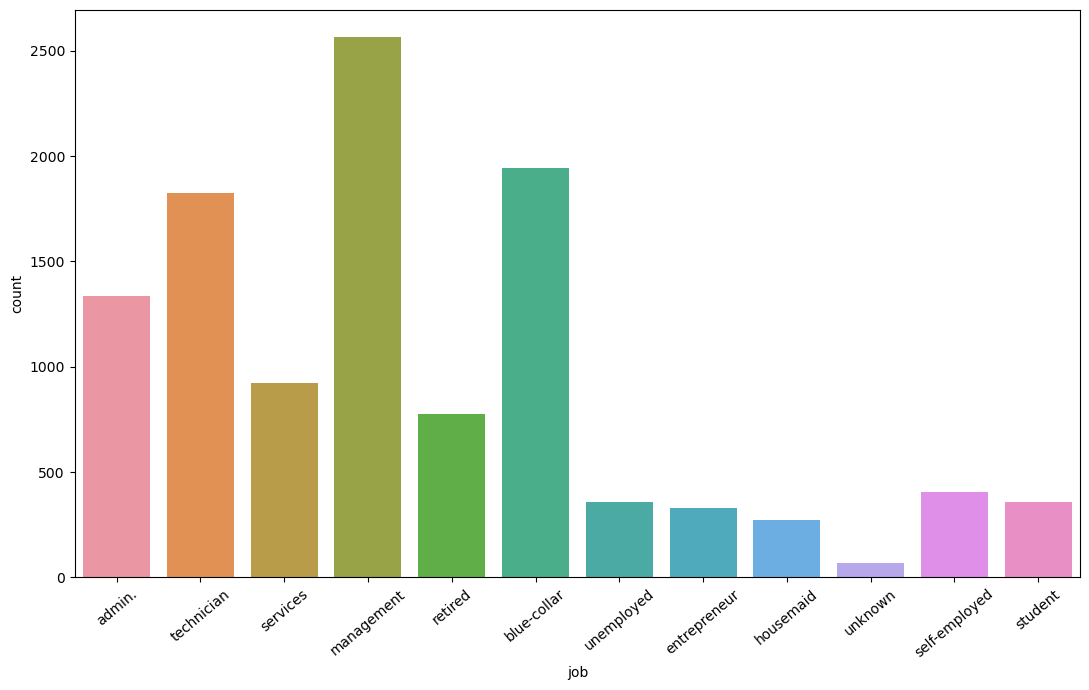

In [113]:
univariate_category(data = df, col = "job")

In [115]:
df["job"] = df["job"].replace(["management", "admin."], "White-collar")
df["job"] = df["job"].replace(["services", "housemaid"], "Pink-collar")
df["job"] = df["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")
df["job"] = df["job"].replace(["self-employed", "entrepreneur"], "self-depend")

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['White-collar', 'technician', 'Pink-collar', 'Others', 'blue-collar', 'self-depend']
Value count and %
               Count percentage
White-collar   3900     34.94%
blue-collar    1944     17.42%
technician     1823     16.33%
Others         1565     14.02%
Pink-collar    1197     10.72%
self-depend     733      6.57%


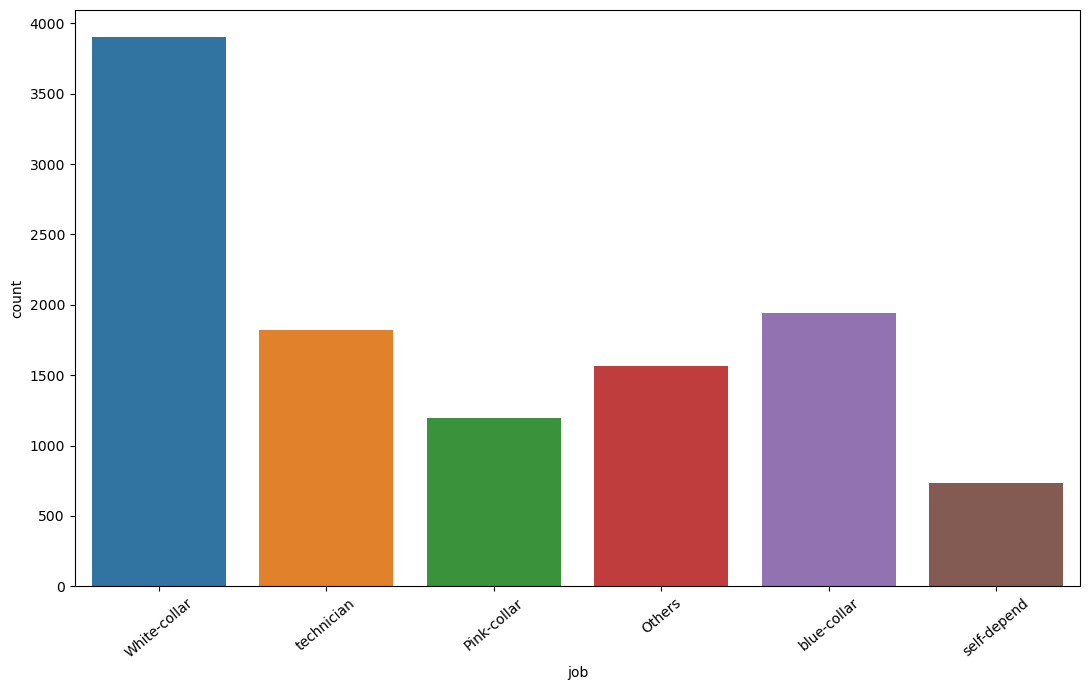

In [117]:
univariate_category(data = df, col = "job") 

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced']
Value count and %
           Count percentage
married    6351      56.9%
single     3518     31.52%
divorced   1293     11.58%


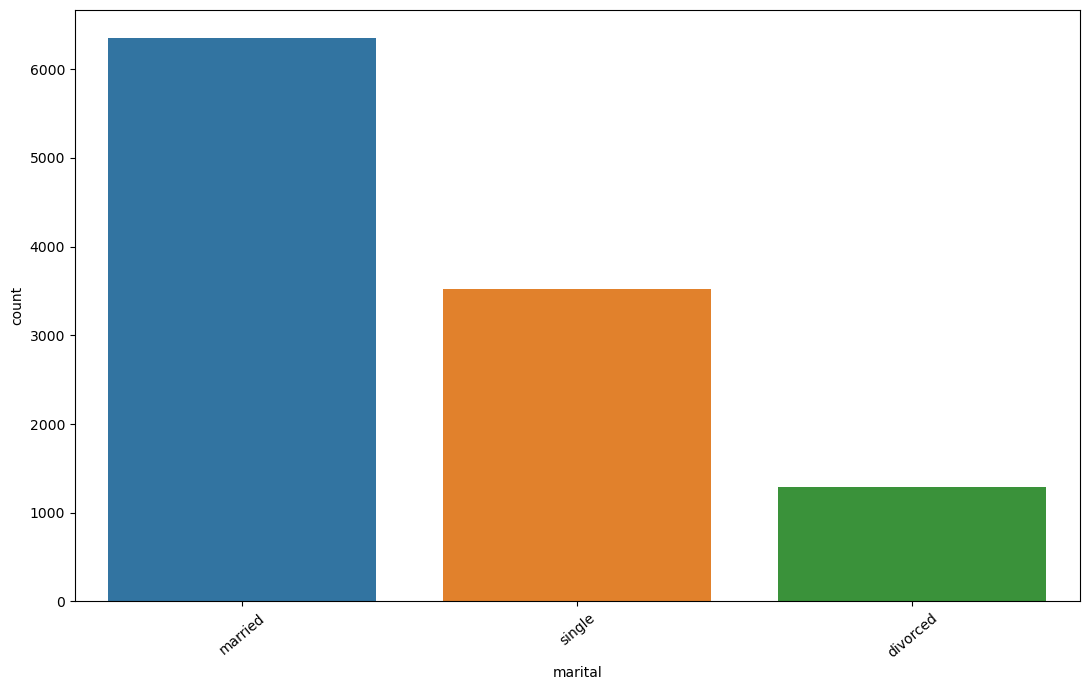

In [118]:
univariate_category(data = df, col = "marital") 

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
Value count and %
            Count percentage
secondary   5476     49.06%
tertiary    3689     33.05%
primary     1500     13.44%
unknown      497      4.45%


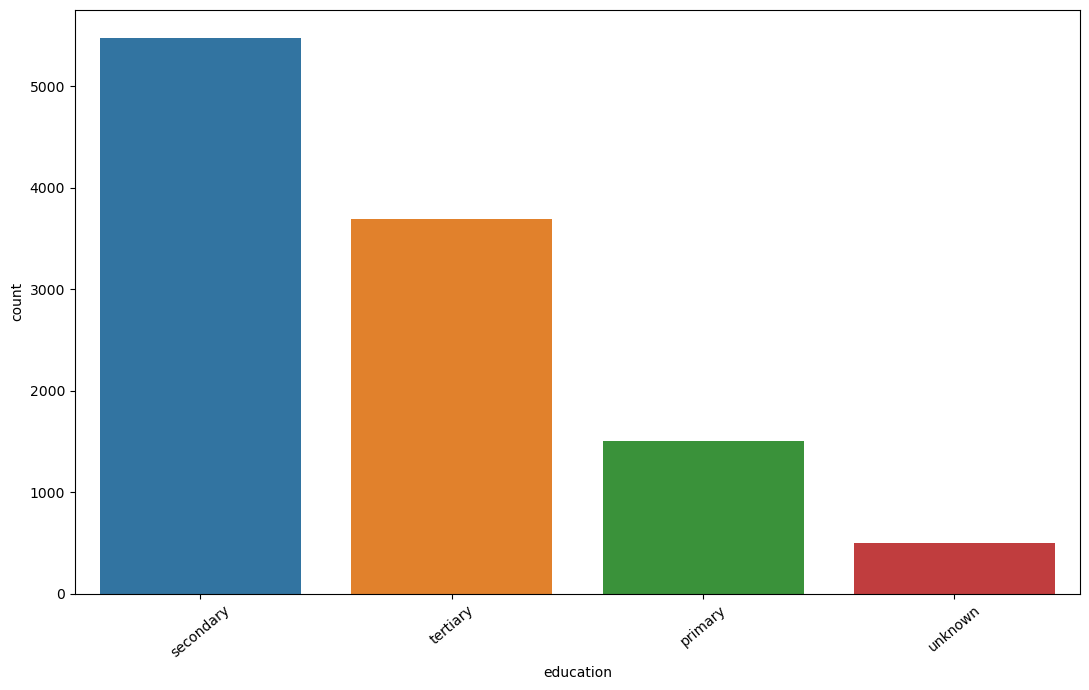

In [119]:
univariate_category(data = df, col = "education") 

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no   10994     98.49%
yes    168      1.51%


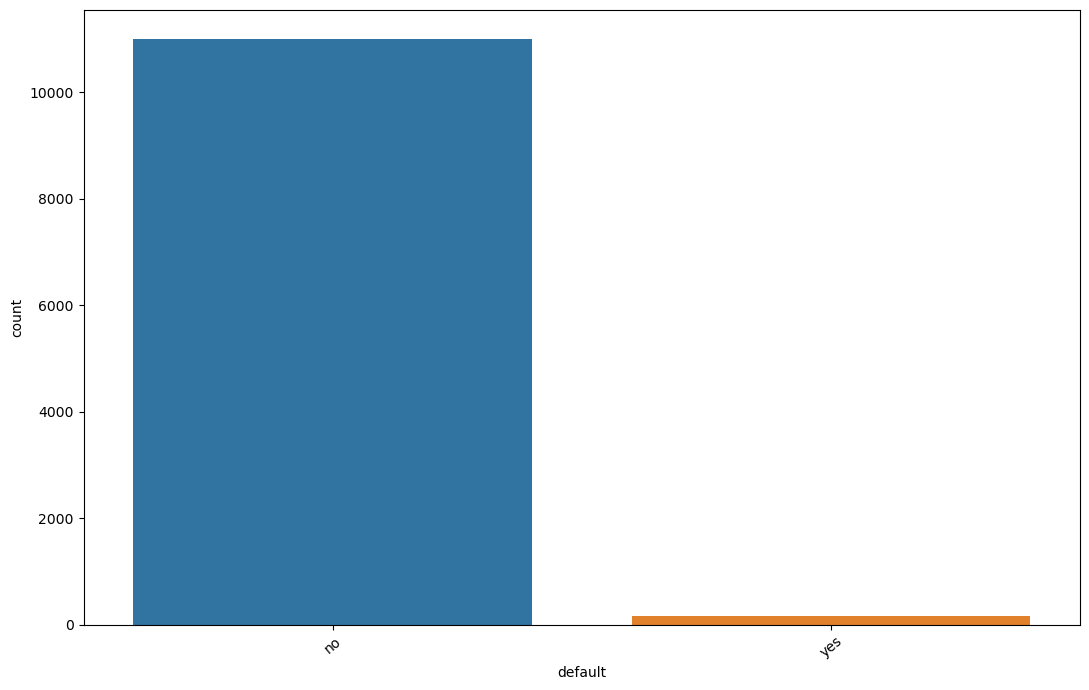

In [120]:
univariate_category(data = df, col = "default") 

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5881     52.69%
yes   5281     47.31%


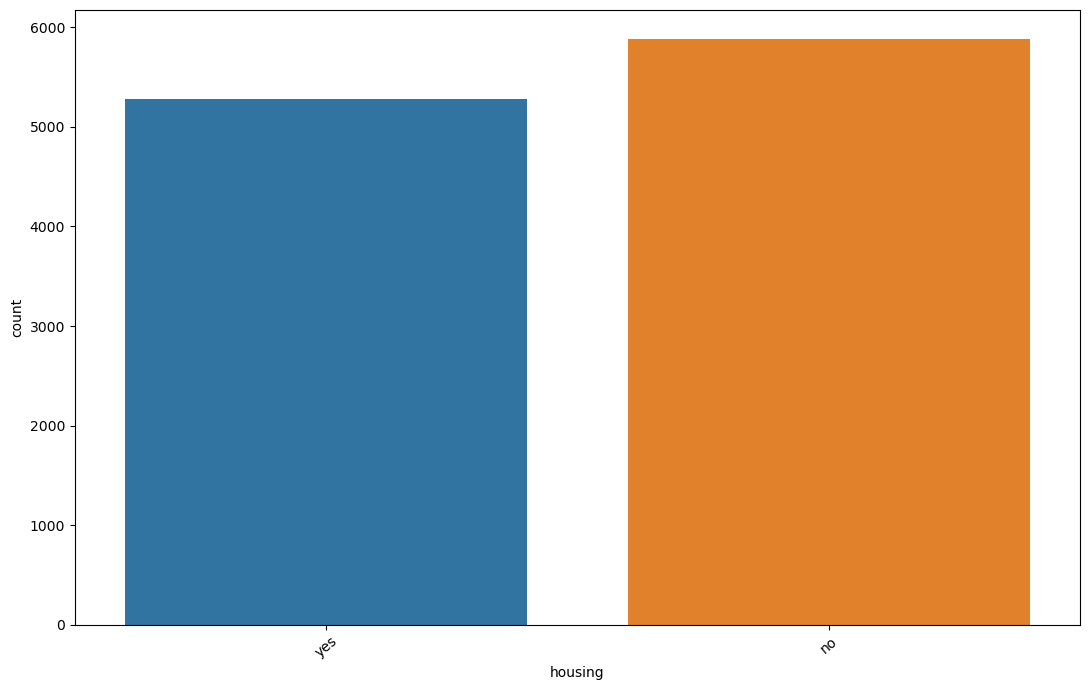

In [121]:
univariate_category(data = df, col = "housing") 

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no    9702     86.92%
yes   1460     13.08%


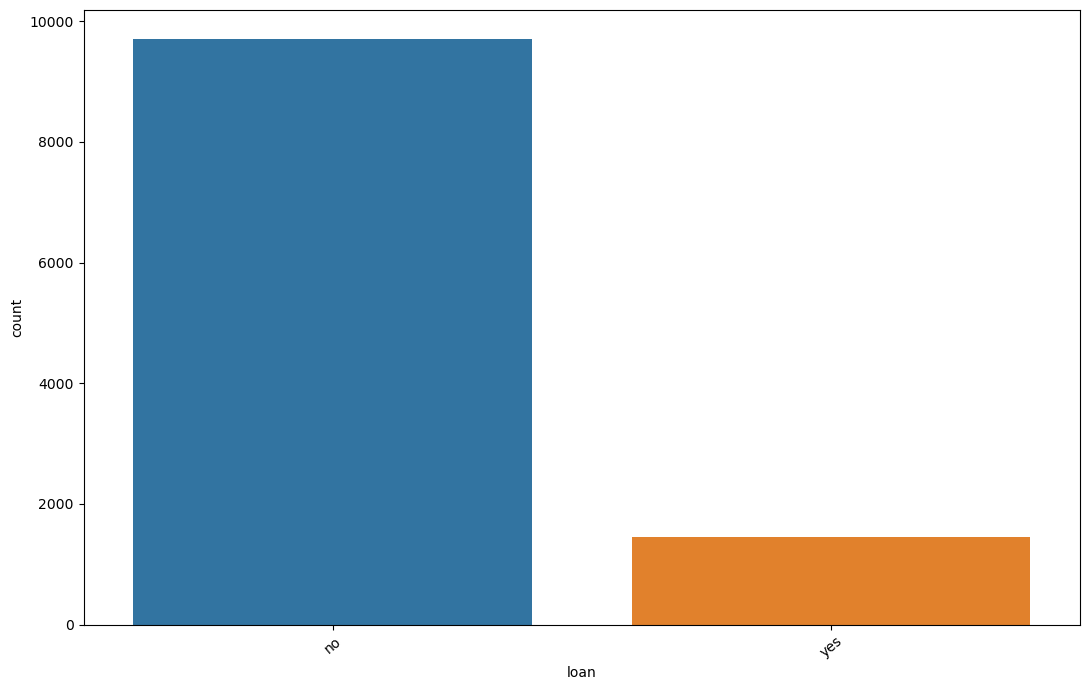

In [122]:
univariate_category(data = df, col = "loan") 

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['unknown', 'cellular', 'telephone']
Value count and %
            Count percentage
cellular    8042     72.05%
unknown     2346     21.02%
telephone    774      6.93%


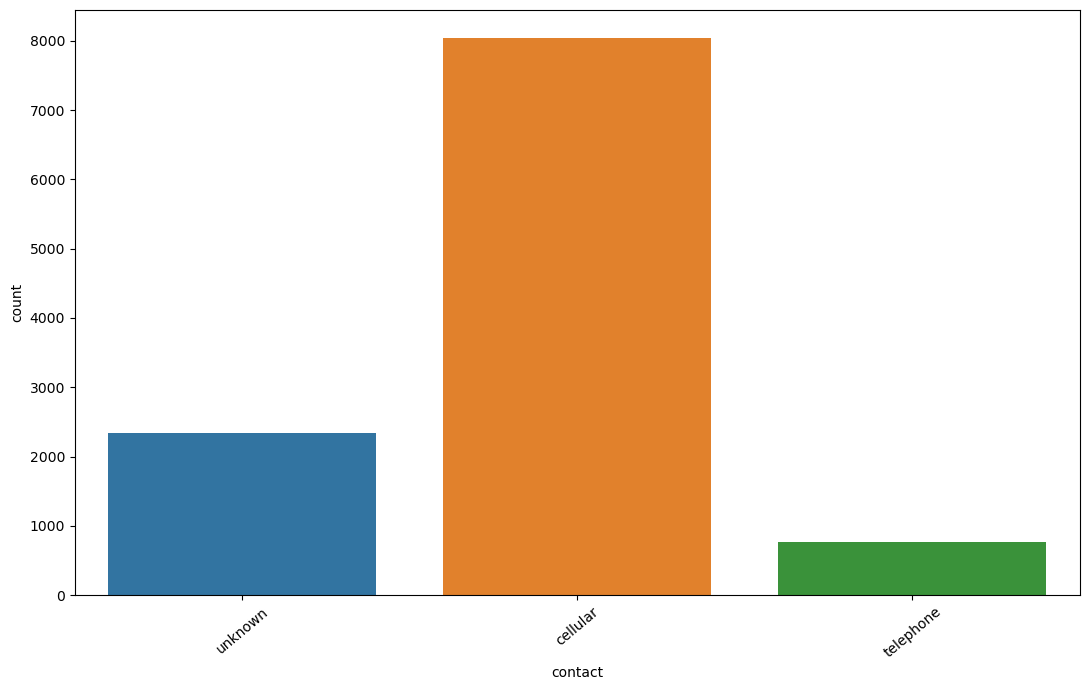

In [123]:
univariate_category(data = df, col = "contact") 

In [124]:
df.drop(columns = ["contact"], inplace = True) 

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Value count and %
      Count percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


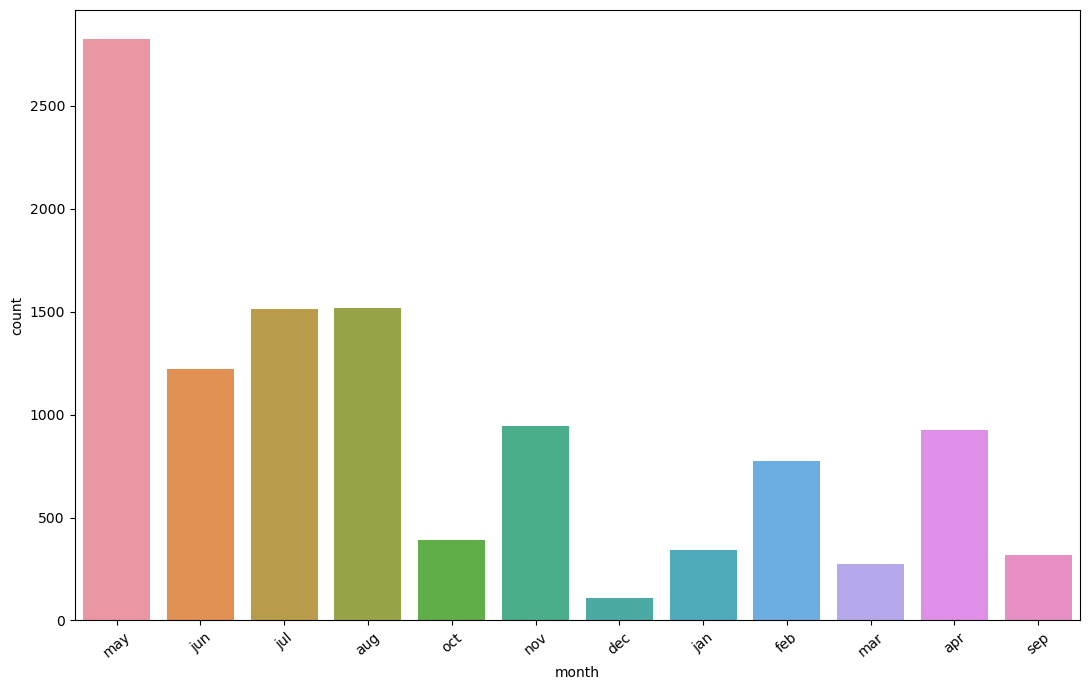

In [125]:
univariate_category(data = df, col = "month")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
Value count and %
          Count percentage
unknown   8326     74.59%
failure   1228      11.0%
success   1071       9.6%
other      537      4.81%


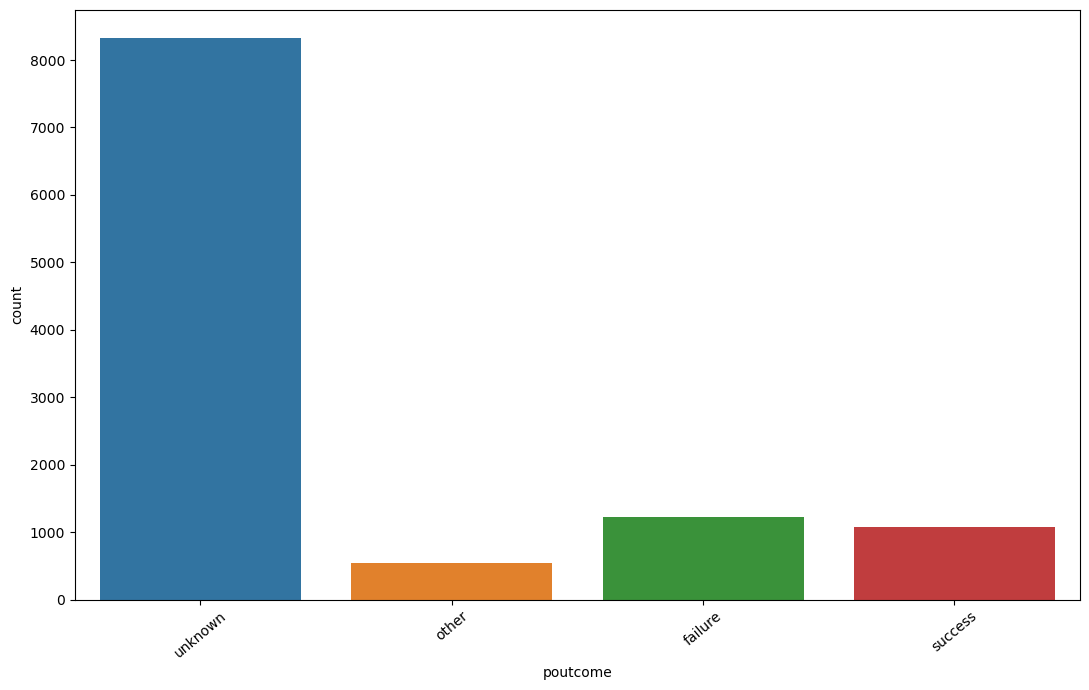

In [126]:
univariate_category(data = df, col = "poutcome")

In [127]:
df["poutcome"] = df["poutcome"].replace(["unknown", "other"], "other")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['other', 'failure', 'success']
Value count and %
          Count percentage
other     8863      79.4%
failure   1228      11.0%
success   1071       9.6%


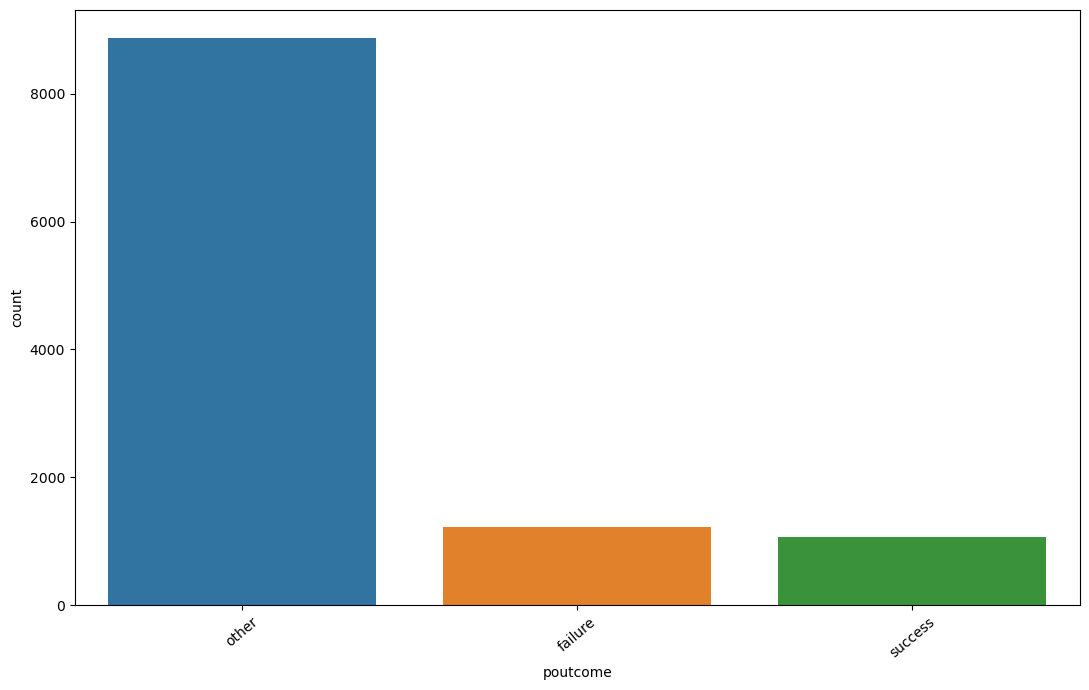

In [128]:
univariate_category(data = df, col = "poutcome")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5873     52.62%
yes   5289     47.38%


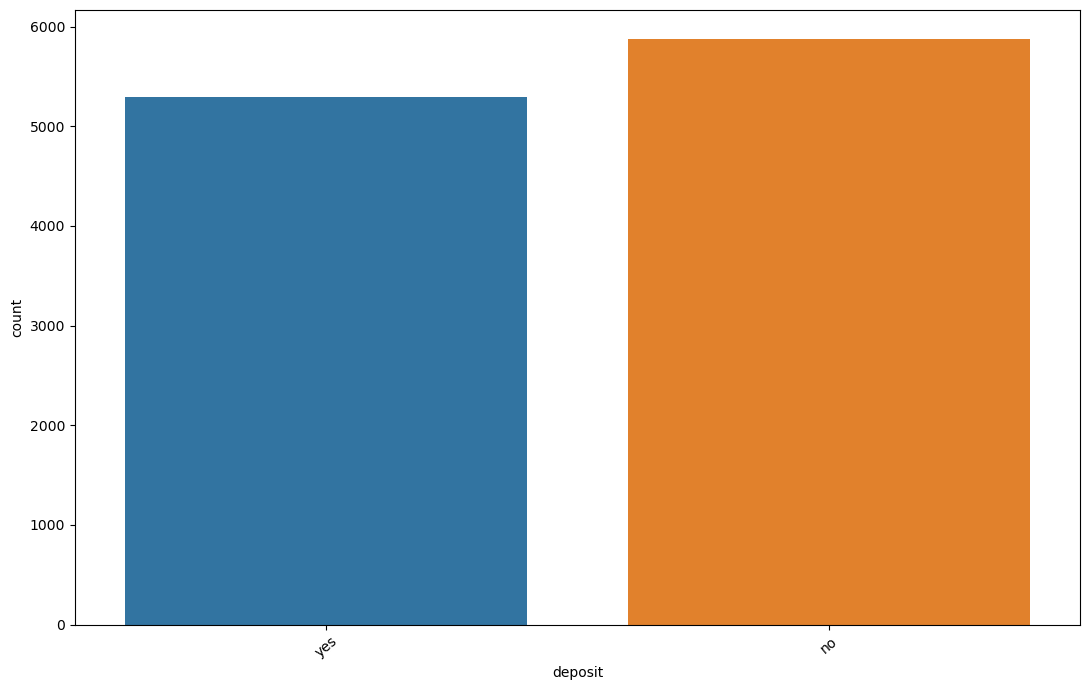

In [129]:
univariate_category(data = df, col = "deposit")

In [130]:
df["deposit"] = df["deposit"].map({"yes":1, "no":0})

## Univariate Analysis - Numerical 

In [132]:
df.dtypes[df.dtypes != "object"].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [135]:
def univariate_numerical(data, col):
    missing = data[col].isnull().sum()
    min_val = round(data[col].min(), 2)
    max_val = round(data[col].max(), 2)
    mean = round(data[col].mean(), 2)
    var = round(data[col].var(), 2)
    std = round(data[col].std(), 2)
    range_val = round(max_val - min_val, 2)
    q1 = round(data[col].quantile(.25), 2)
    q2 = round(data[col].quantile(.5), 2)
    q3 = round(data[col].quantile(.75), 2)
    skew = round(data[col].skew(), 2)
    kurt = round(data[col].kurt(), 2)
    my_val = {"missing" : missing, "min" : min_val, "max" : max_val, "mean" : mean,
             "var" : var,"std" : std, "range" : range_val,"q1" : q1, "q2" : q2,"q3" : q3,
            "skewness" : skew, "kurtosis" : kurt}
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data = data, y = data[col])
    plt.show()
    return my_val

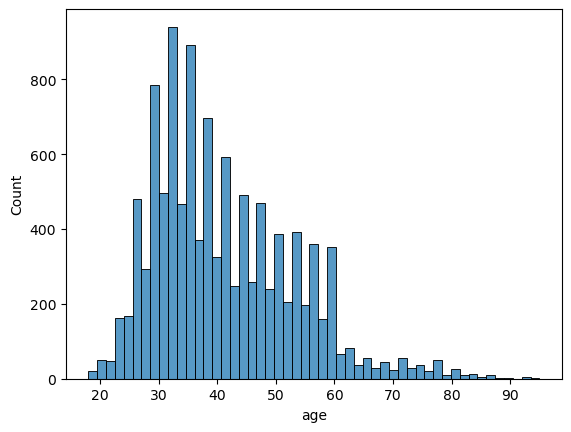

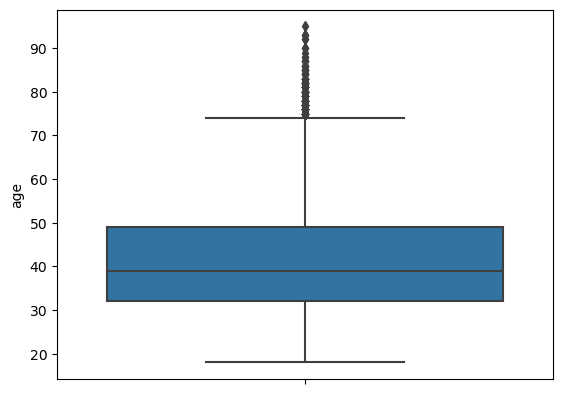

{'missing': 0,
 'min': 18,
 'max': 95,
 'mean': 41.23,
 'var': 141.93,
 'std': 11.91,
 'range': 77,
 'q1': 32.0,
 'q2': 39.0,
 'q3': 49.0,
 'skewness': 0.86,
 'kurtosis': 0.62}

In [136]:
univariate_numerical(data = df, col = "age")

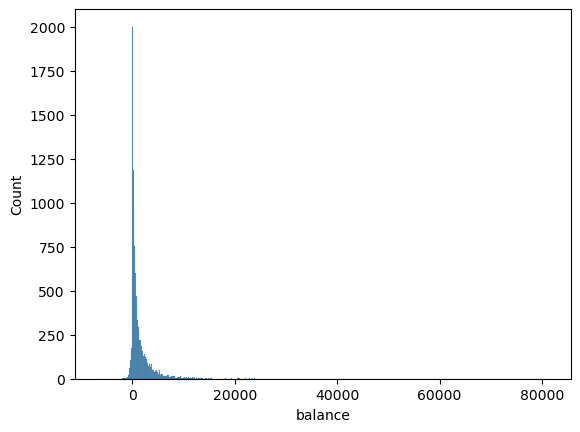

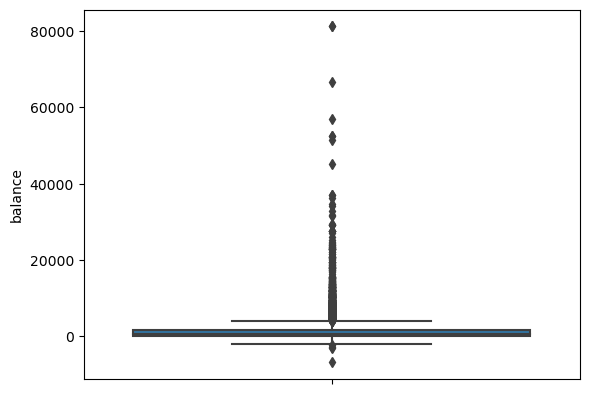

{'missing': 0,
 'min': -6847,
 'max': 81204,
 'mean': 1528.54,
 'var': 10403291.12,
 'std': 3225.41,
 'range': 88051,
 'q1': 122.0,
 'q2': 550.0,
 'q3': 1708.0,
 'skewness': 8.22,
 'kurtosis': 126.86}

In [137]:
univariate_numerical(data = df, col = "balance")

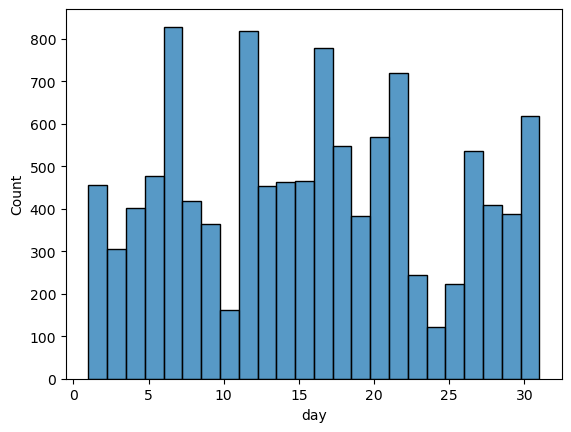

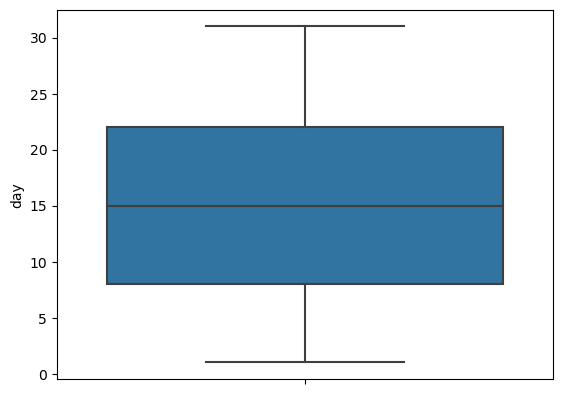

{'missing': 0,
 'min': 1,
 'max': 31,
 'mean': 15.66,
 'var': 70.91,
 'std': 8.42,
 'range': 30,
 'q1': 8.0,
 'q2': 15.0,
 'q3': 22.0,
 'skewness': 0.11,
 'kurtosis': -1.06}

In [138]:
univariate_numerical(data = df, col = "day")

In [139]:
df.drop(columns = "day", inplace = True)

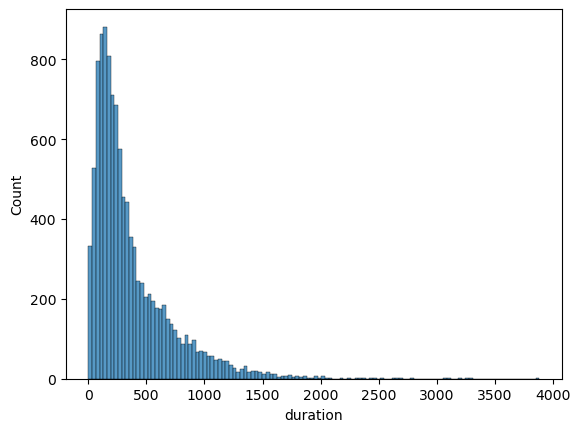

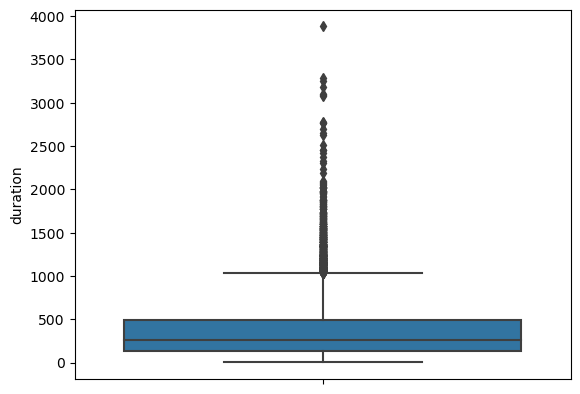

{'missing': 0,
 'min': 2,
 'max': 3881,
 'mean': 371.99,
 'var': 120498.12,
 'std': 347.13,
 'range': 3879,
 'q1': 138.0,
 'q2': 255.0,
 'q3': 496.0,
 'skewness': 2.14,
 'kurtosis': 7.3}

In [140]:
univariate_numerical(data = df, col = "duration")

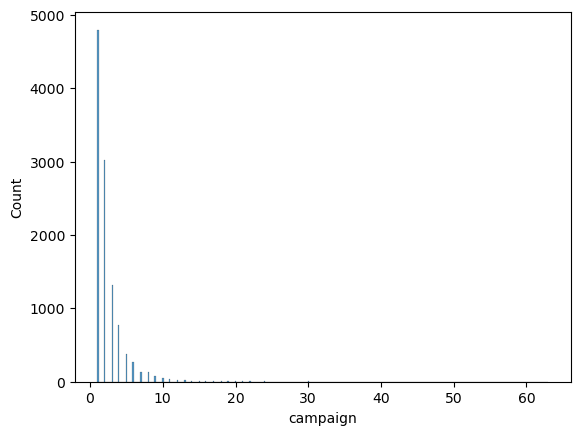

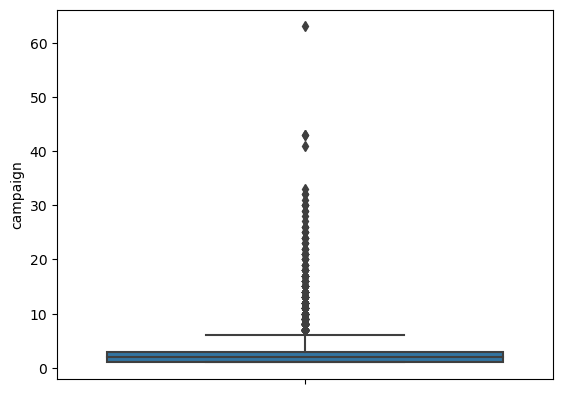

{'missing': 0,
 'min': 1,
 'max': 63,
 'mean': 2.51,
 'var': 7.41,
 'std': 2.72,
 'range': 62,
 'q1': 1.0,
 'q2': 2.0,
 'q3': 3.0,
 'skewness': 5.55,
 'kurtosis': 57.39}

In [141]:
univariate_numerical(data = df, col = "campaign")

<Axes: xlabel='campaign', ylabel='count'>

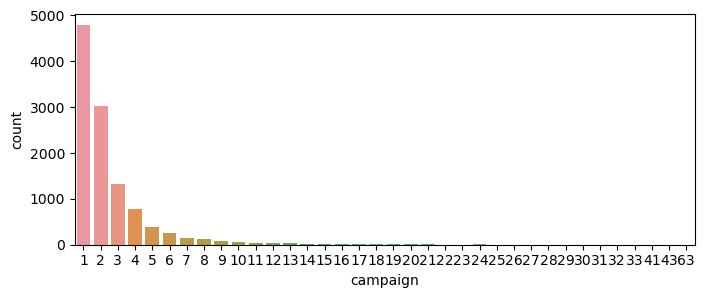

In [142]:
plt.figure(figsize=(8,3))
sns.countplot(data = df, x="campaign")

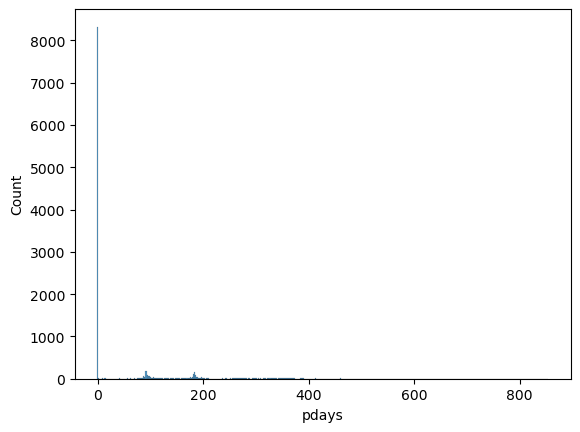

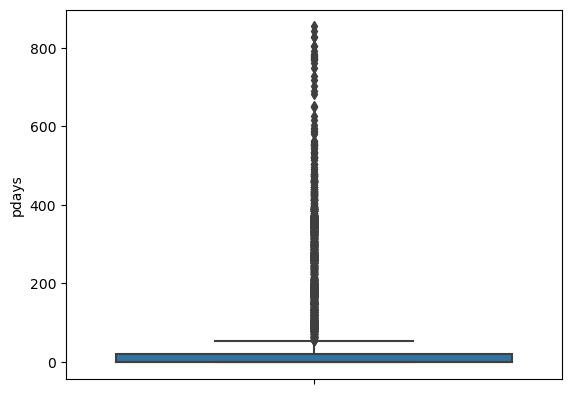

{'missing': 0,
 'min': -1,
 'max': 854,
 'mean': 51.33,
 'var': 11828.36,
 'std': 108.76,
 'range': 855,
 'q1': -1.0,
 'q2': -1.0,
 'q3': 20.75,
 'skewness': 2.45,
 'kurtosis': 6.84}

In [144]:
univariate_numerical(data = df, col = "pdays")

<Axes: xlabel='pdays', ylabel='count'>

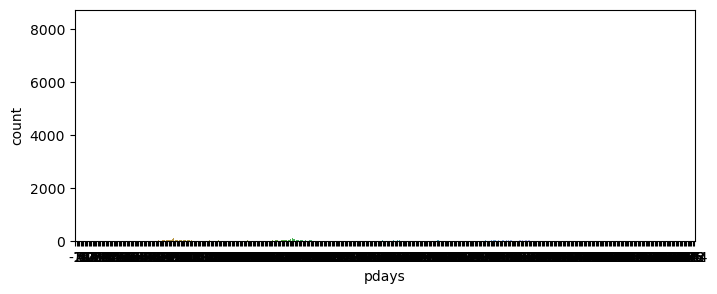

In [147]:
plt.figure(figsize=(8,3))
sns.countplot(data= df, x = "pdays")

In [148]:
df["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [157]:
df.loc[df["pdays"] == -1] = 999
df["recent_pdays"] = 1/df["pdays"]
df.drop(columns = ["pdays"], inplace=True) 

In [159]:
df["recent_pdays"]

0        0.001001
1        0.001001
2        0.001001
3        0.001001
4        0.001001
           ...   
11157    0.001001
11158    0.001001
11159    0.001001
11160    0.005814
11161    0.001001
Name: recent_pdays, Length: 11162, dtype: float64

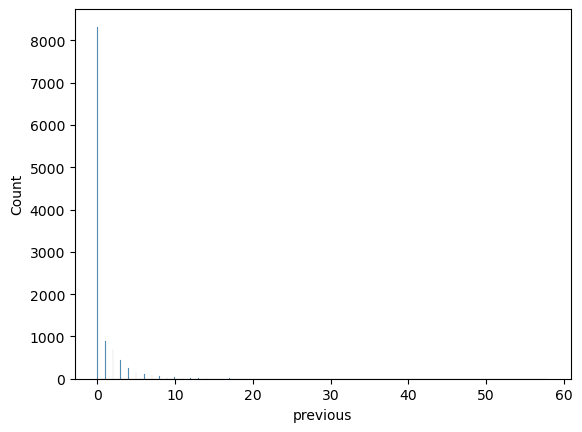

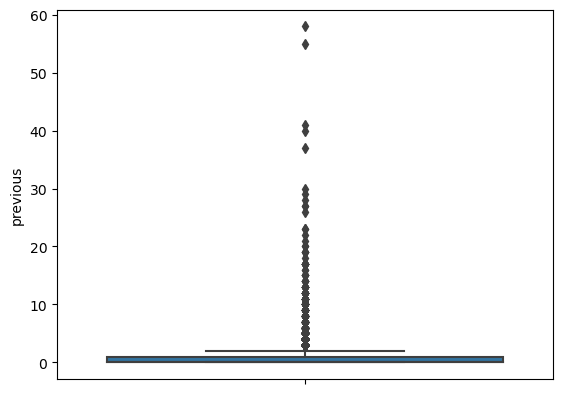

{'missing': 0,
 'min': 0,
 'max': 58,
 'mean': 0.83,
 'var': 5.25,
 'std': 2.29,
 'range': 58,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 7.34,
 'kurtosis': 106.2}

In [160]:
univariate_numerical(data = df, col = "previous")

## Bivariate Analysis 

In [161]:
# cat-cat 
# cat-num
# num-num

## Categorical - Categorical

In [163]:
pd.crosstab(df["job"], df["deposit"])

deposit          0     1
job                     
Others         544  1021
Pink-collar    719   478
White-collar  1968  1932
blue-collar   1236   708
self-depend    423   310
technician     983   840

In [168]:
pd.crosstab(df["job"], df["deposit"], normalize = "index")

deposit              0         1
job                             
Others        0.347604  0.652396
Pink-collar   0.600668  0.399332
White-collar  0.504615  0.495385
blue-collar   0.635802  0.364198
self-depend   0.577080  0.422920
technician    0.539221  0.460779

In [169]:
pd.crosstab(df["job"], df["deposit"], normalize = "columns")

deposit              0         1
job                             
Others        0.092627  0.193042
Pink-collar   0.122425  0.090376
White-collar  0.335093  0.365286
blue-collar   0.210455  0.133863
self-depend   0.072025  0.058612
technician    0.167376  0.158820

In [170]:
df.dtypes[df.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome'],
      dtype='object')

In [173]:
pd.crosstab(df["marital"], df["deposit"], normalize = "index")

deposit          0         1
marital                     
divorced  0.518948  0.481052
married   0.566210  0.433790
single    0.456509  0.543491

In [175]:
pd.crosstab(df["education"], df["deposit"], normalize = "index")

deposit           0         1
education                    
primary    0.606000  0.394000
secondary  0.552593  0.447407
tertiary   0.458932  0.541068
unknown    0.492958  0.507042

In [176]:
pd.crosstab(df["default"], df["deposit"], normalize = "index")

deposit         0         1
default                    
no       0.523649  0.476351
yes      0.690476  0.309524

In [177]:
pd.crosstab(df["housing"], df["deposit"], normalize = "index")

deposit         0         1
housing                    
no       0.429689  0.570311
yes      0.633592  0.366408

In [178]:
pd.crosstab(df["loan"], df["deposit"], normalize = "index")

deposit         0         1
loan                       
no       0.504741  0.495259
yes      0.668493  0.331507

In [179]:
pd.crosstab(df["month"], df["deposit"], normalize = "index")

deposit         0         1
month                      
apr      0.374865  0.625135
aug      0.547070  0.452930
dec      0.090909  0.909091
feb      0.431701  0.568299
jan      0.587209  0.412791
jul      0.585865  0.414135
jun      0.553191  0.446809
mar      0.101449  0.898551
may      0.672450  0.327550
nov      0.572641  0.427359
oct      0.176020  0.823980
sep      0.156740  0.843260

In [180]:
pd.crosstab(df["poutcome"], df["deposit"], normalize = "index")

deposit          0         1
poutcome                    
failure   0.496743  0.503257
other     0.583324  0.416676
success   0.086835  0.913165

In [181]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

## Categorical - Numerical

In [182]:
df.groupby(["deposit"]).agg({"age": ["min", "max", "mean", "median", "std", "count"]})

age                                       
        min max       mean median        std count
deposit                                           
0        18  89  40.837391   39.0  10.264815  5873
1        18  95  41.670070   38.0  13.497781  5289

<Axes: xlabel='deposit'>

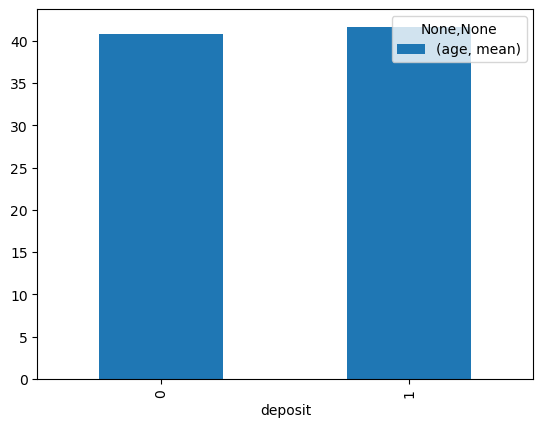

In [183]:
df.groupby(["deposit"]).agg({"age" : ["mean"]}).plot(kind = "bar")

In [187]:
df.groupby(["deposit"]).agg({"balance": ["min", "max", "mean", "median", "std", "count"]})

balance                                              
            min    max         mean median          std count
deposit                                                      
0         -6847  66653  1280.227141  414.0  2933.411934  5873
1         -3058  81204  1804.267915  733.0  3501.104777  5289

In [189]:
df.groupby(["deposit"]).agg({"duration": ["min", "max", "mean", "median", "std", "count"]})

duration                                           
             min   max        mean median         std count
deposit                                                    
0              2  3284  223.130257  163.0  208.577530  5873
1              8  3881  537.294574  426.0  392.525262  5289

## Numerical - Numerical

<Axes: xlabel='age', ylabel='balance'>

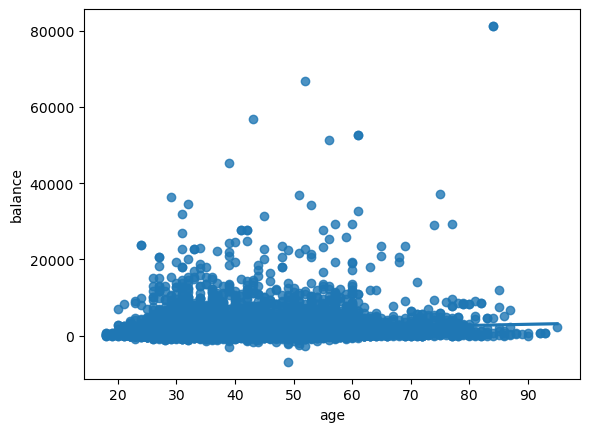

In [197]:
sns.regplot(data = df, x = "age", y = "balance") 

In [199]:
df[["age", "balance"]].corr()

age  balance
age      1.0000   0.1123
balance  0.1123   1.0000

<Axes: xlabel='age', ylabel='duration'>

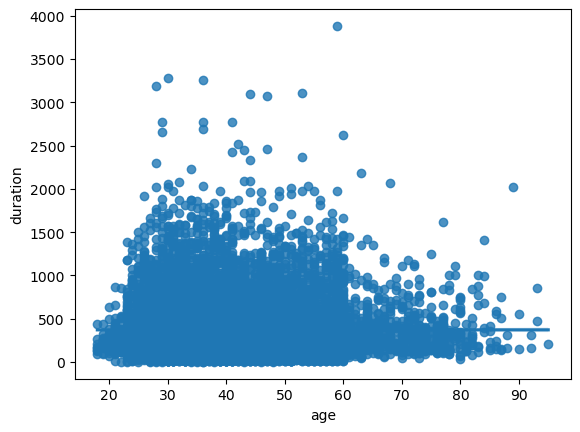

In [200]:
sns.regplot(data = df, x = "age", y = "duration") 

<Axes: xlabel='balance', ylabel='duration'>

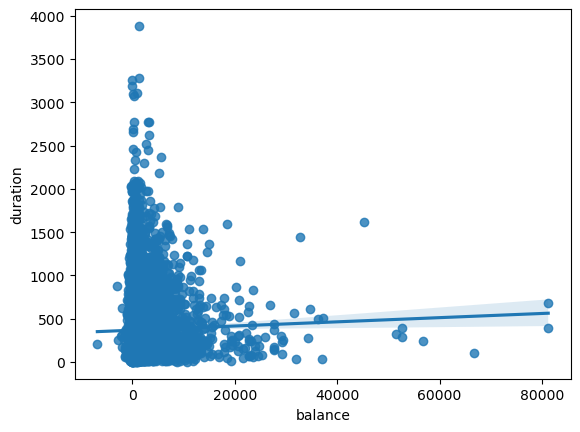

In [202]:
sns.regplot(data = df, x = "balance", y = "duration") 

In [201]:
df[["age", "duration"]].corr()

age  duration
age       1.000000  0.000189
duration  0.000189  1.000000

In [203]:
df[["balance", "duration"]].corr()

balance  duration
balance   1.000000  0.022436
duration  0.022436  1.000000

## Missing Value Treatment 

In [208]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
month           0
duration        0
campaign        0
previous        0
poutcome        0
deposit         0
recent_pdays    0
dtype: int64

## Outlier Treatment

<Axes: ylabel='age'>

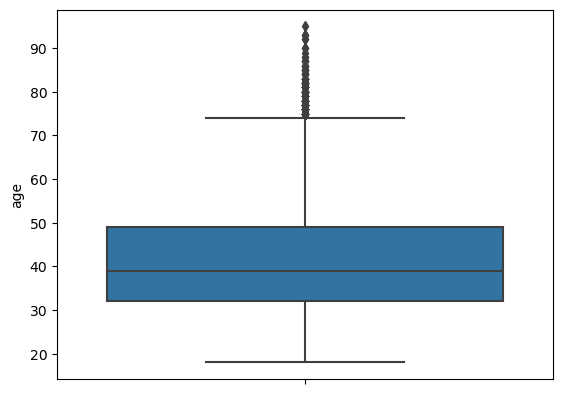

In [210]:
sns.boxplot(data = df, y = "age")

In [215]:
def outlier_treatment(col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    lower_cap = q1 - 1.5 * (q3 - q1)
    upper_cap = q3 + 1.5 * (q3 - q1)

    df[col] = np.where(df[col] >= upper_cap, upper_cap, df[col])
    df[col] = np.where(df[col] <= lower_cap, lower_cap, df[col])

<Axes: ylabel='age'>

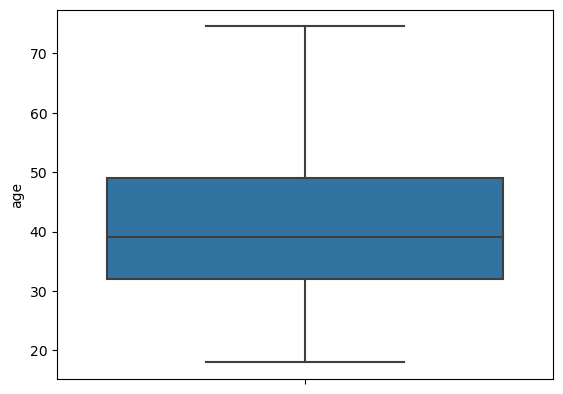

In [217]:
outlier_treatment(col = "age")
sns.boxplot(data = df, y = "age")

<Axes: ylabel='balance'>

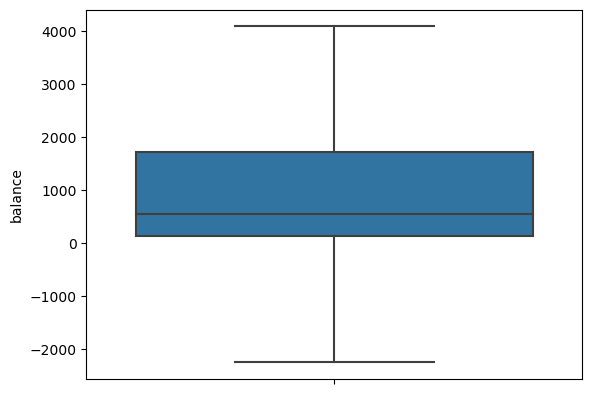

In [220]:
outlier_treatment(col = "balance")
sns.boxplot(data = df, y = "balance")

<Axes: ylabel='duration'>

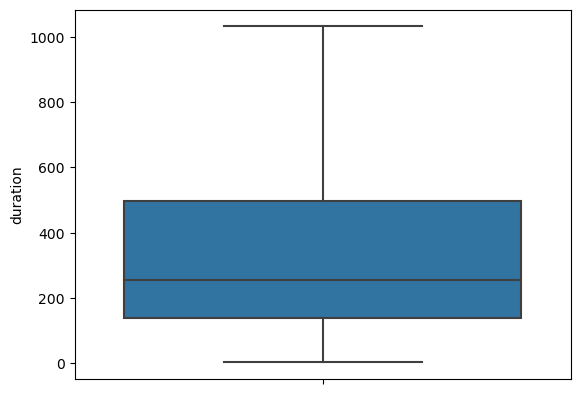

In [222]:
outlier_treatment(col = "duration")
sns.boxplot(data = df, y = "duration")

<Axes: ylabel='campaign'>

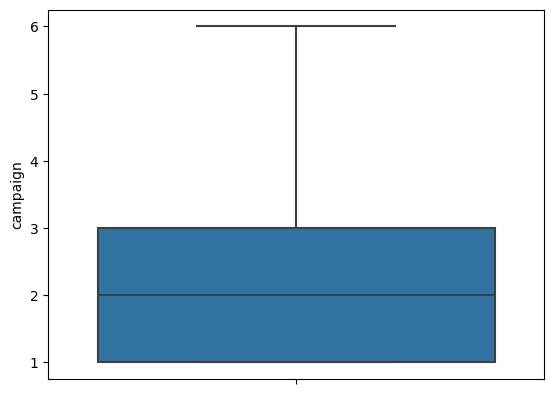

In [224]:
outlier_treatment(col = "campaign")
sns.boxplot(data = df, y = "campaign")

<Axes: ylabel='previous'>

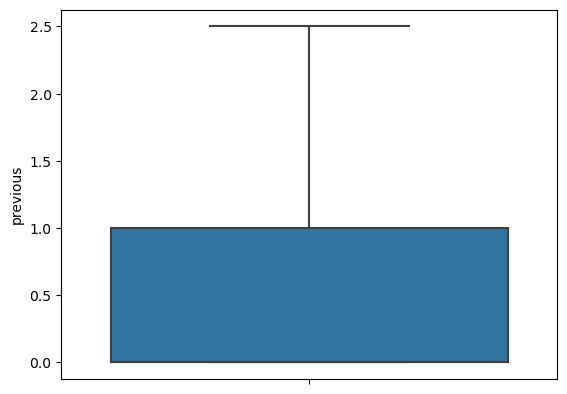

In [226]:
outlier_treatment(col = "previous")
sns.boxplot(data = df, y = "previous")

<Axes: ylabel='recent_pdays'>

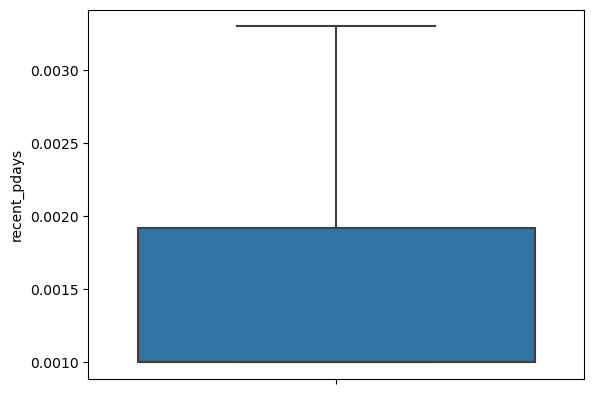

In [229]:
outlier_treatment(col = "recent_pdays")
sns.boxplot(data = df, y = "recent_pdays")

## Creating Dummy Variables

In [230]:
df1 = pd.get_dummies(data = df, drop_first = True)

In [231]:
df1.head()

age  balance  duration  campaign  previous  deposit  recent_pdays  \
0  59.0   2343.0    1033.0       1.0       0.0        1      0.001001   
1  56.0     45.0    1033.0       1.0       0.0        1      0.001001   
2  41.0   1270.0    1033.0       1.0       0.0        1      0.001001   
3  55.0   2476.0     579.0       1.0       0.0        1      0.001001   
4  54.0    184.0     673.0       2.0       0.0        1      0.001001   

   job_Pink-collar  job_White-collar  job_blue-collar  ...  month_jan  \
0                0                 1                0  ...          0   
1                0                 1                0  ...          0   
2                0                 0                0  ...          0   
3                1                 0                0  ...          0   
4                0                 1                0  ...          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  
0          0               1                 0  
1          0               1                 0  
2          0               1                 0  
3          0               1                 0  
4          0               1                 0  

[5 rows x 33 columns]

In [232]:
df1.shape

(11162, 33)

In [233]:
df1.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
previous               0
deposit                0
recent_pdays           0
job_Pink-collar        0
job_White-collar       0
job_blue-collar        0
job_self-depend        0
job_technician         0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
dtype: int64

## Model Development 

In [234]:
x = df1.drop(columns = "deposit")
y = df1["deposit"]

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21)

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [238]:
model.score(x_train, y_train)

0.8158197875335979

In [239]:
model.score(x_test, y_test)

0.8175574798447298

In [240]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [241]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4126
           1       0.82      0.78      0.80      3687

    accuracy                           0.82      7813
   macro avg       0.82      0.81      0.81      7813
weighted avg       0.82      0.82      0.82      7813



In [242]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1747
           1       0.82      0.79      0.81      1602

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print("Train Accuracy: ", round(tree.score(x_train, y_train), 3))
print("Test Accuracy :", round(tree.score(x_test, y_test), 3))

Train Accuracy:  1.0
Test Accuracy : 0.743


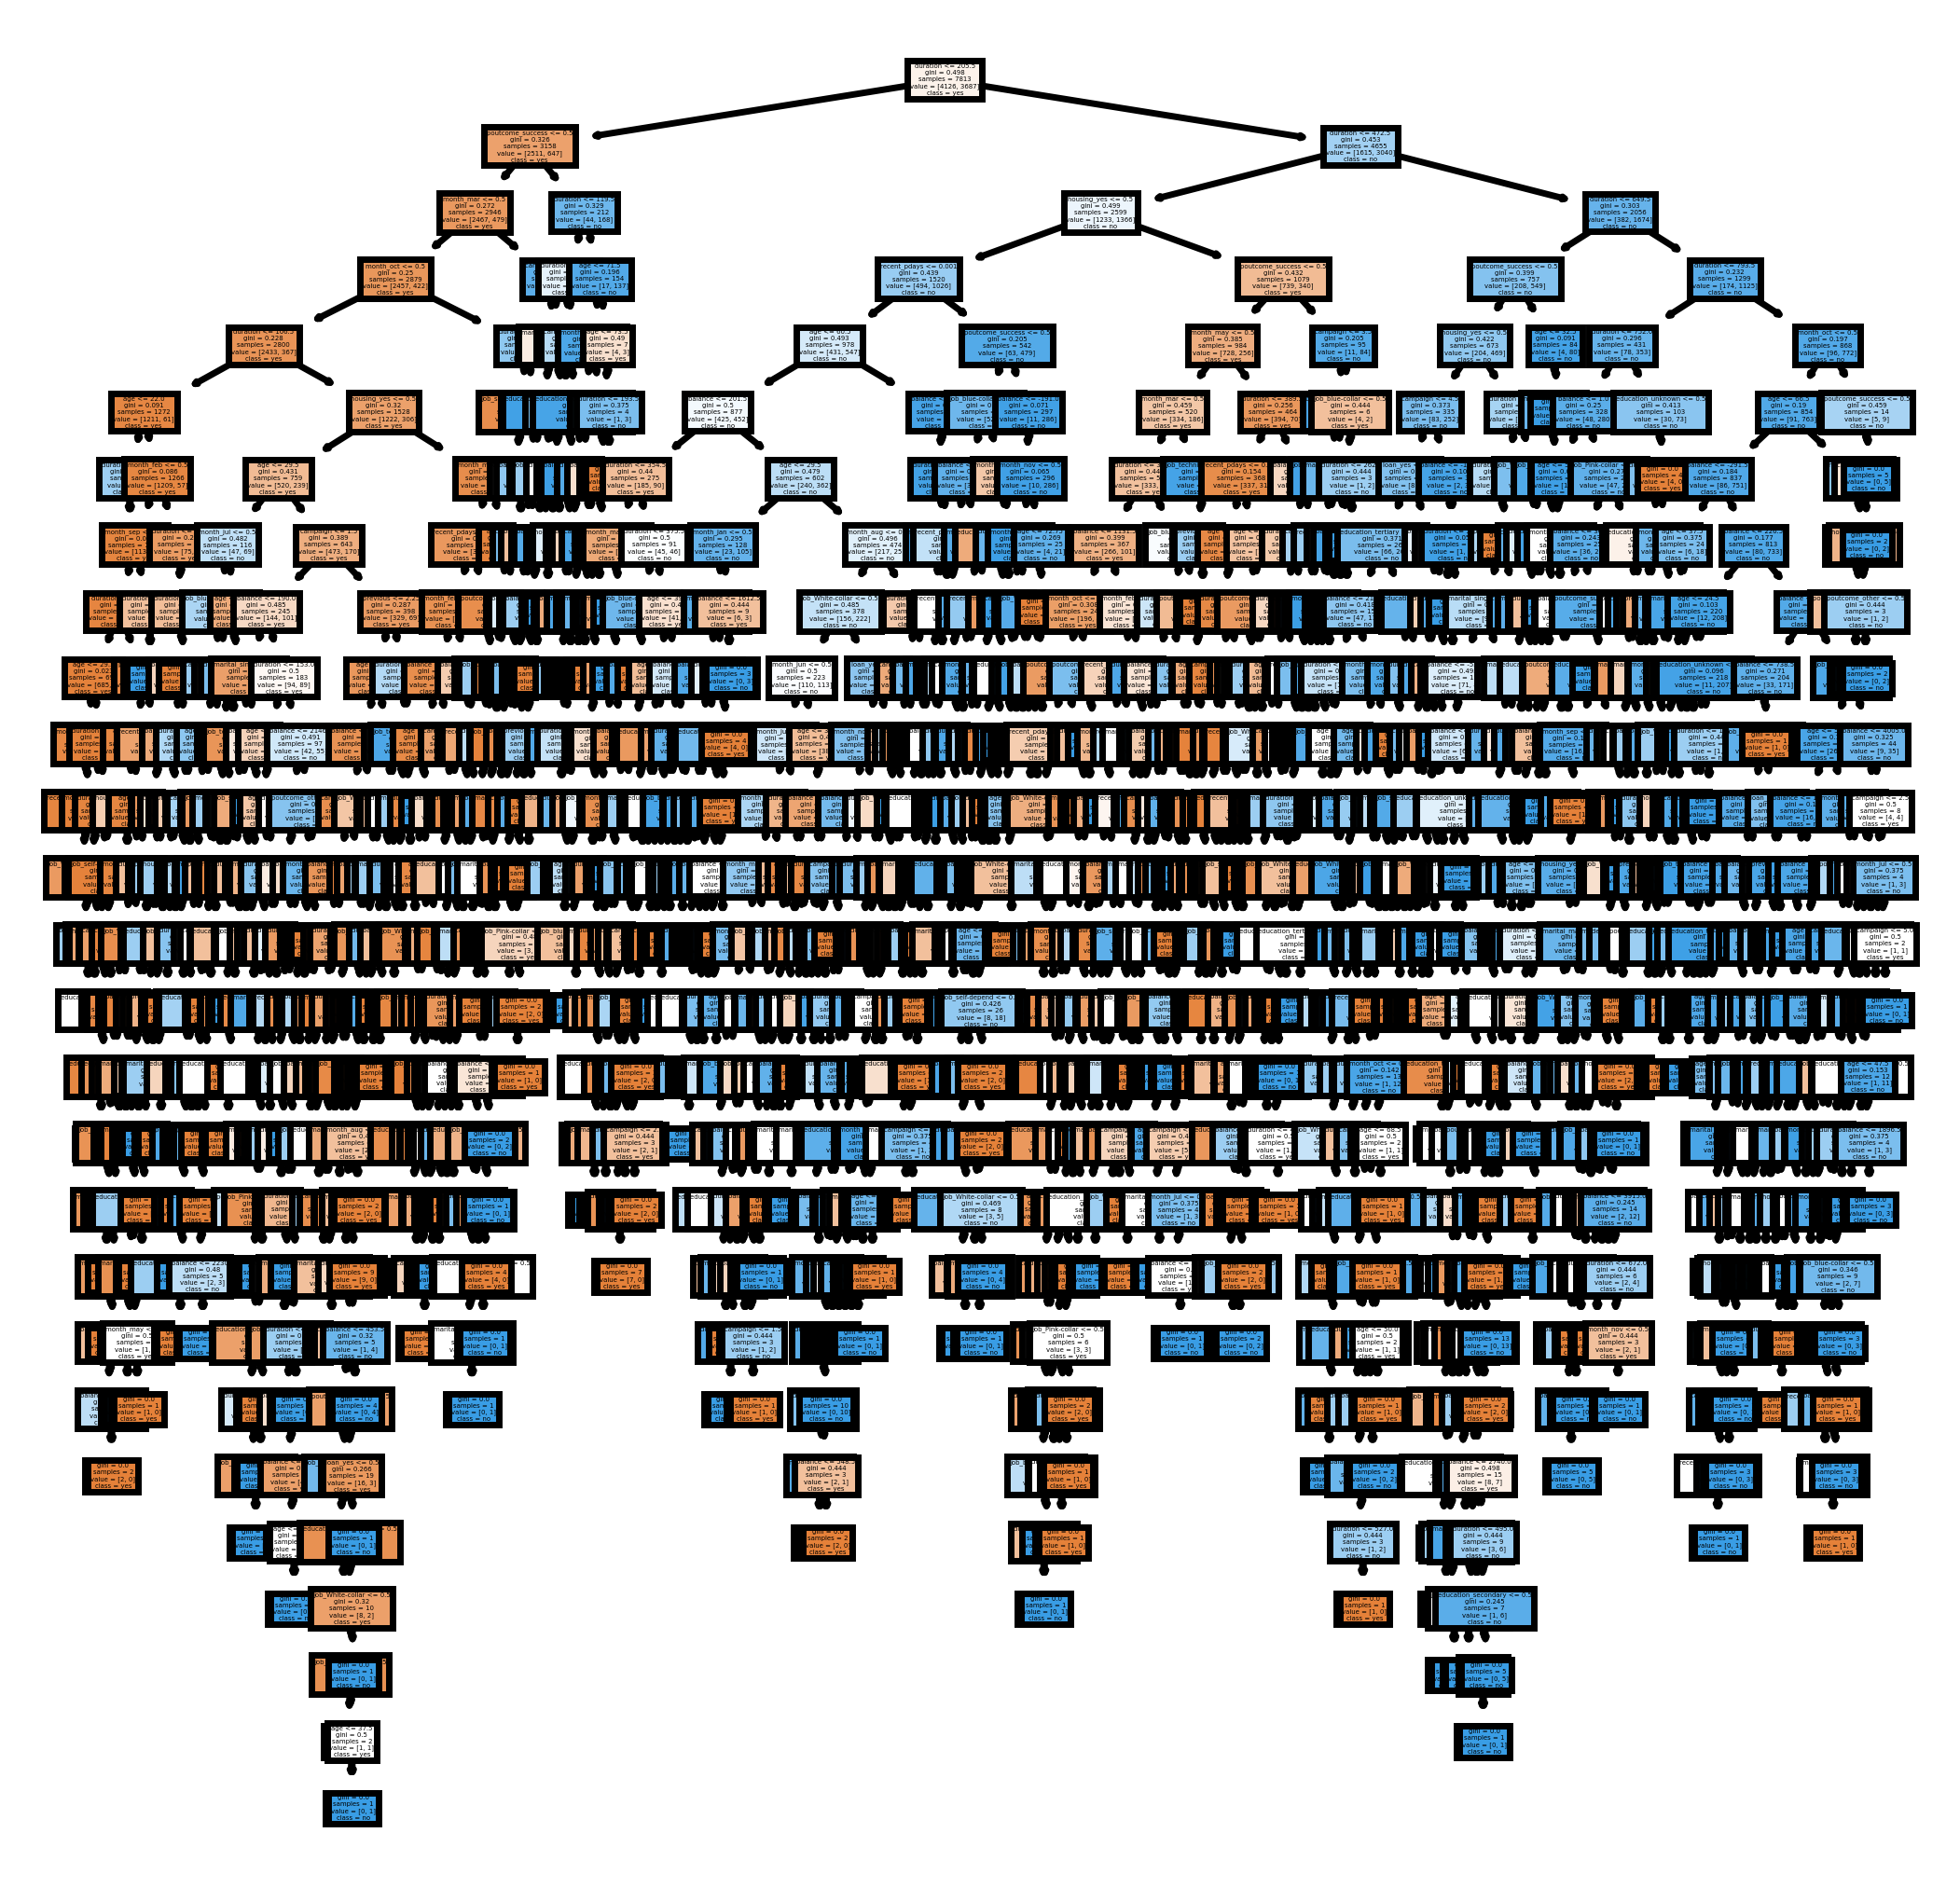

In [247]:
from sklearn.tree import plot_tree
fn = x_train.columns.to_list()
cn = ["yes", "no"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 500)
dt_plot = plot_tree(tree, feature_names = fn, class_names = cn, filled = True)

In [248]:
tree1 = DecisionTreeClassifier(max_depth = 7)
tree1.fit(x_train, y_train)
print("Train Accuracy :", round(tree1.score(x_train, y_train),3))
print("Test Accuracy :", round(tree1.score(x_test, y_test),3))

Train Accuracy : 0.825
Test Accuracy : 0.791


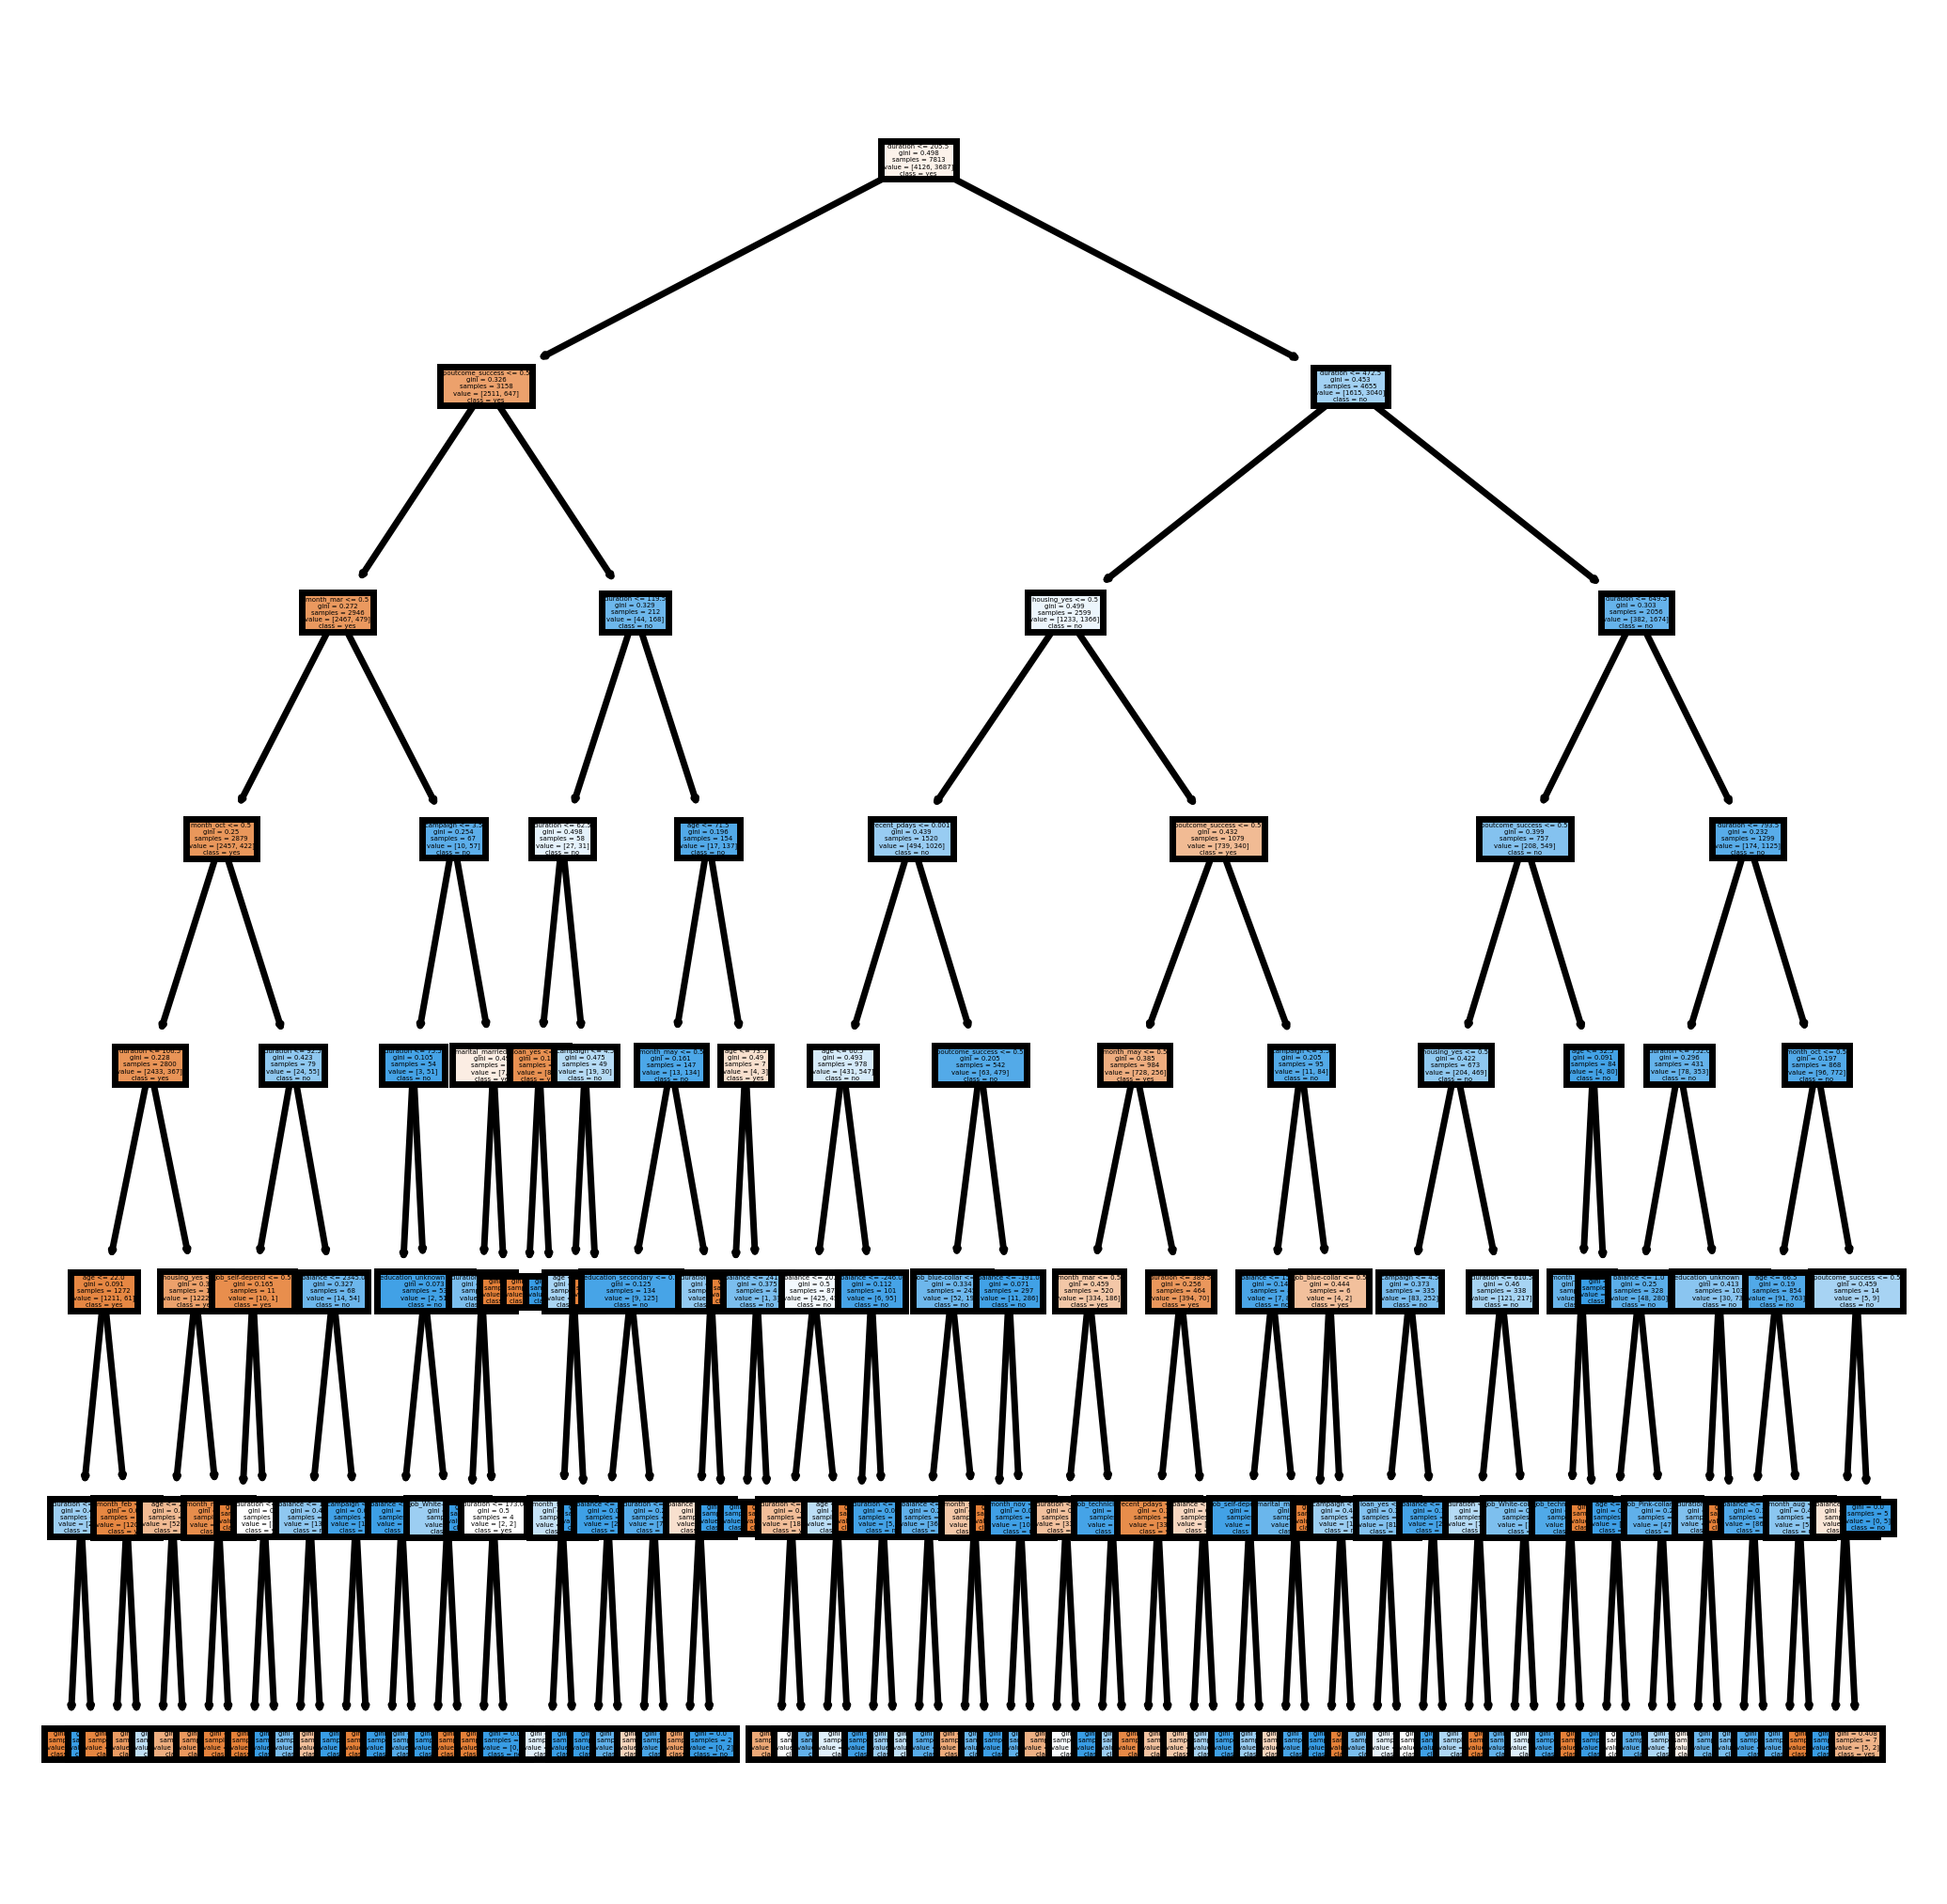

In [251]:
from sklearn.tree import plot_tree
fn = x_train.columns.to_list()
cn = ["yes", "no"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 500)
dt_plot = plot_tree(tree1, feature_names = fn, class_names = cn, filled = True)

In [256]:
tree1 = DecisionTreeClassifier(min_samples_split = 200)
tree1.fit(x_train, y_train)
print("Train Accuracy : " + str(round(tree1.score(x_train, y_train), 3) * 100) + str('%'))
print("Test Accuracy :" + str(round(tree1.score(x_test, y_test), 3) * 100) + str("%"))

Train Accuracy : 82.39999999999999%
Test Accuracy :80.5%


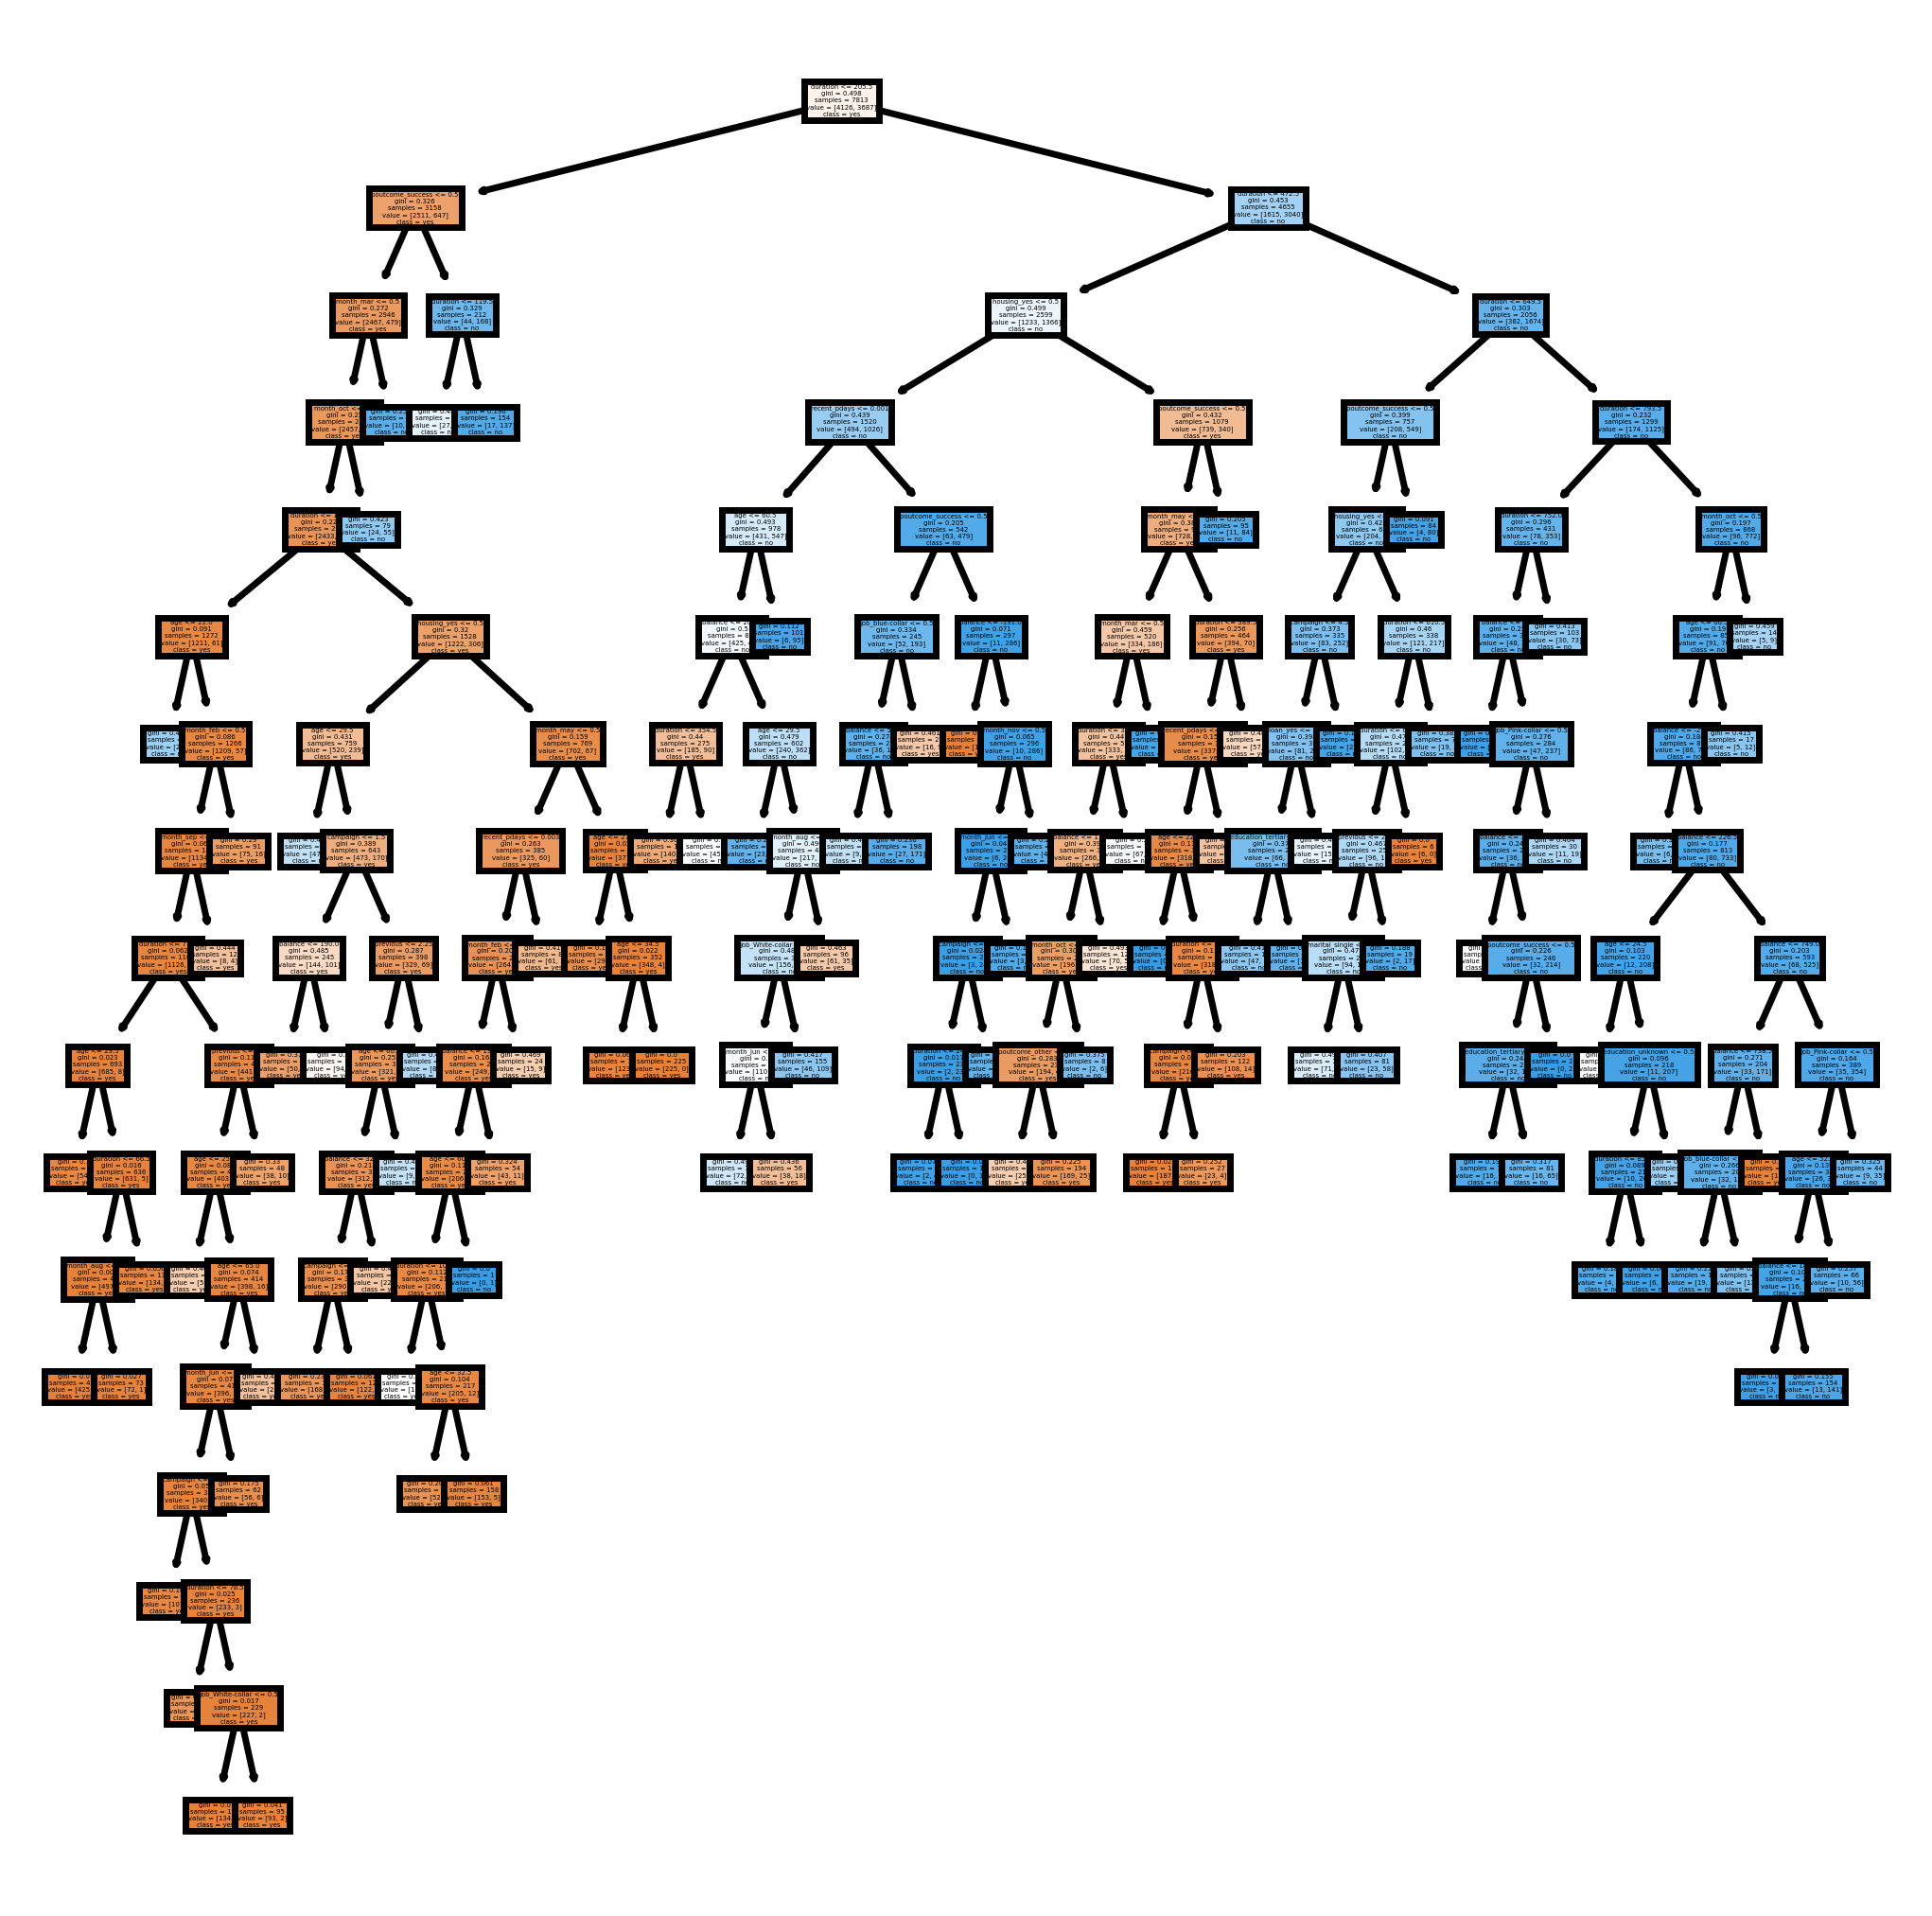

In [257]:
from sklearn.tree import plot_tree
fn = x_train.columns.to_list()
cn = ["yes", "no"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 500)
dt_plot = plot_tree(tree1, feature_names = fn, class_names = cn, filled = True)

In [253]:
tree1 = DecisionTreeClassifier(min_samples_leaf = 50)
tree1.fit(x_train, y_train)
print("Train Accuracy : " + str(round(tree1.score(x_train, y_train), 3) * 100) + str('%'))
print("Test Accuracy :" + str(round(tree1.score(x_test, y_test), 3) * 100) + str("%"))

Train Accuracy : 82.39999999999999%
Test Accuracy :80.9%


In [254]:
tree1 = DecisionTreeClassifier(criterion = "gini")
tree1.fit(x_train, y_train)
print("Train Accuracy : " + str(round(tree1.score(x_train, y_train), 3) * 100) + str('%'))
print("Test Accuracy :" + str(round(tree1.score(x_test, y_test), 3) * 100) + str("%"))

Train Accuracy : 100.0%
Test Accuracy :73.7%


In [255]:
tree1 = DecisionTreeClassifier(criterion = "entropy")
tree1.fit(x_train, y_train)
print("Train Accuracy : " + str(round(tree1.score(x_train, y_train), 3) * 100) + str('%'))
print("Test Accuracy :" + str(round(tree1.score(x_test, y_test), 3) * 100) + str("%"))

Train Accuracy : 100.0%
Test Accuracy :73.3%


#### Our model is overfitting as train results are far better than test. To avoid overfitting :  (Control the Parameters) Cross Validation  

## Grid Search - Parameter Tuning 

In [261]:
from sklearn.model_selection import GridSearchCV
params = {"criterion" : ["gini", "entropy"],
    "max_depth" : [5, 7, 9, 10, 11],
    "min_samples_split" : [10, 15, 20, 50, 100, 200, 250],
    "min_samples_leaf" : [5, 10, 15, 20, 50, 80, 100]}

tree_g = DecisionTreeClassifier(random_state = 21)
gd_search = GridSearchCV(estimator = tree_g , param_grid = params , cv = 10, n_jobs = 1)
gd_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=21), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]})

In [262]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 100}

In [263]:
gd_search.best_score_

0.8085238938864527

In [264]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=100,
                       random_state=21)

In [265]:
tree2 = DecisionTreeClassifier(criterion = "gini",max_depth = 10,
                            min_samples_leaf = 5, 
                            min_samples_split = 100)
tree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=100)

In [267]:
print("Train Accuracy :", round(tree1.score(x_train, y_train),3))
print("Test Accuracy :", round(tree1.score(x_test, y_test),3))

Train Accuracy : 0.824
Test Accuracy : 0.805


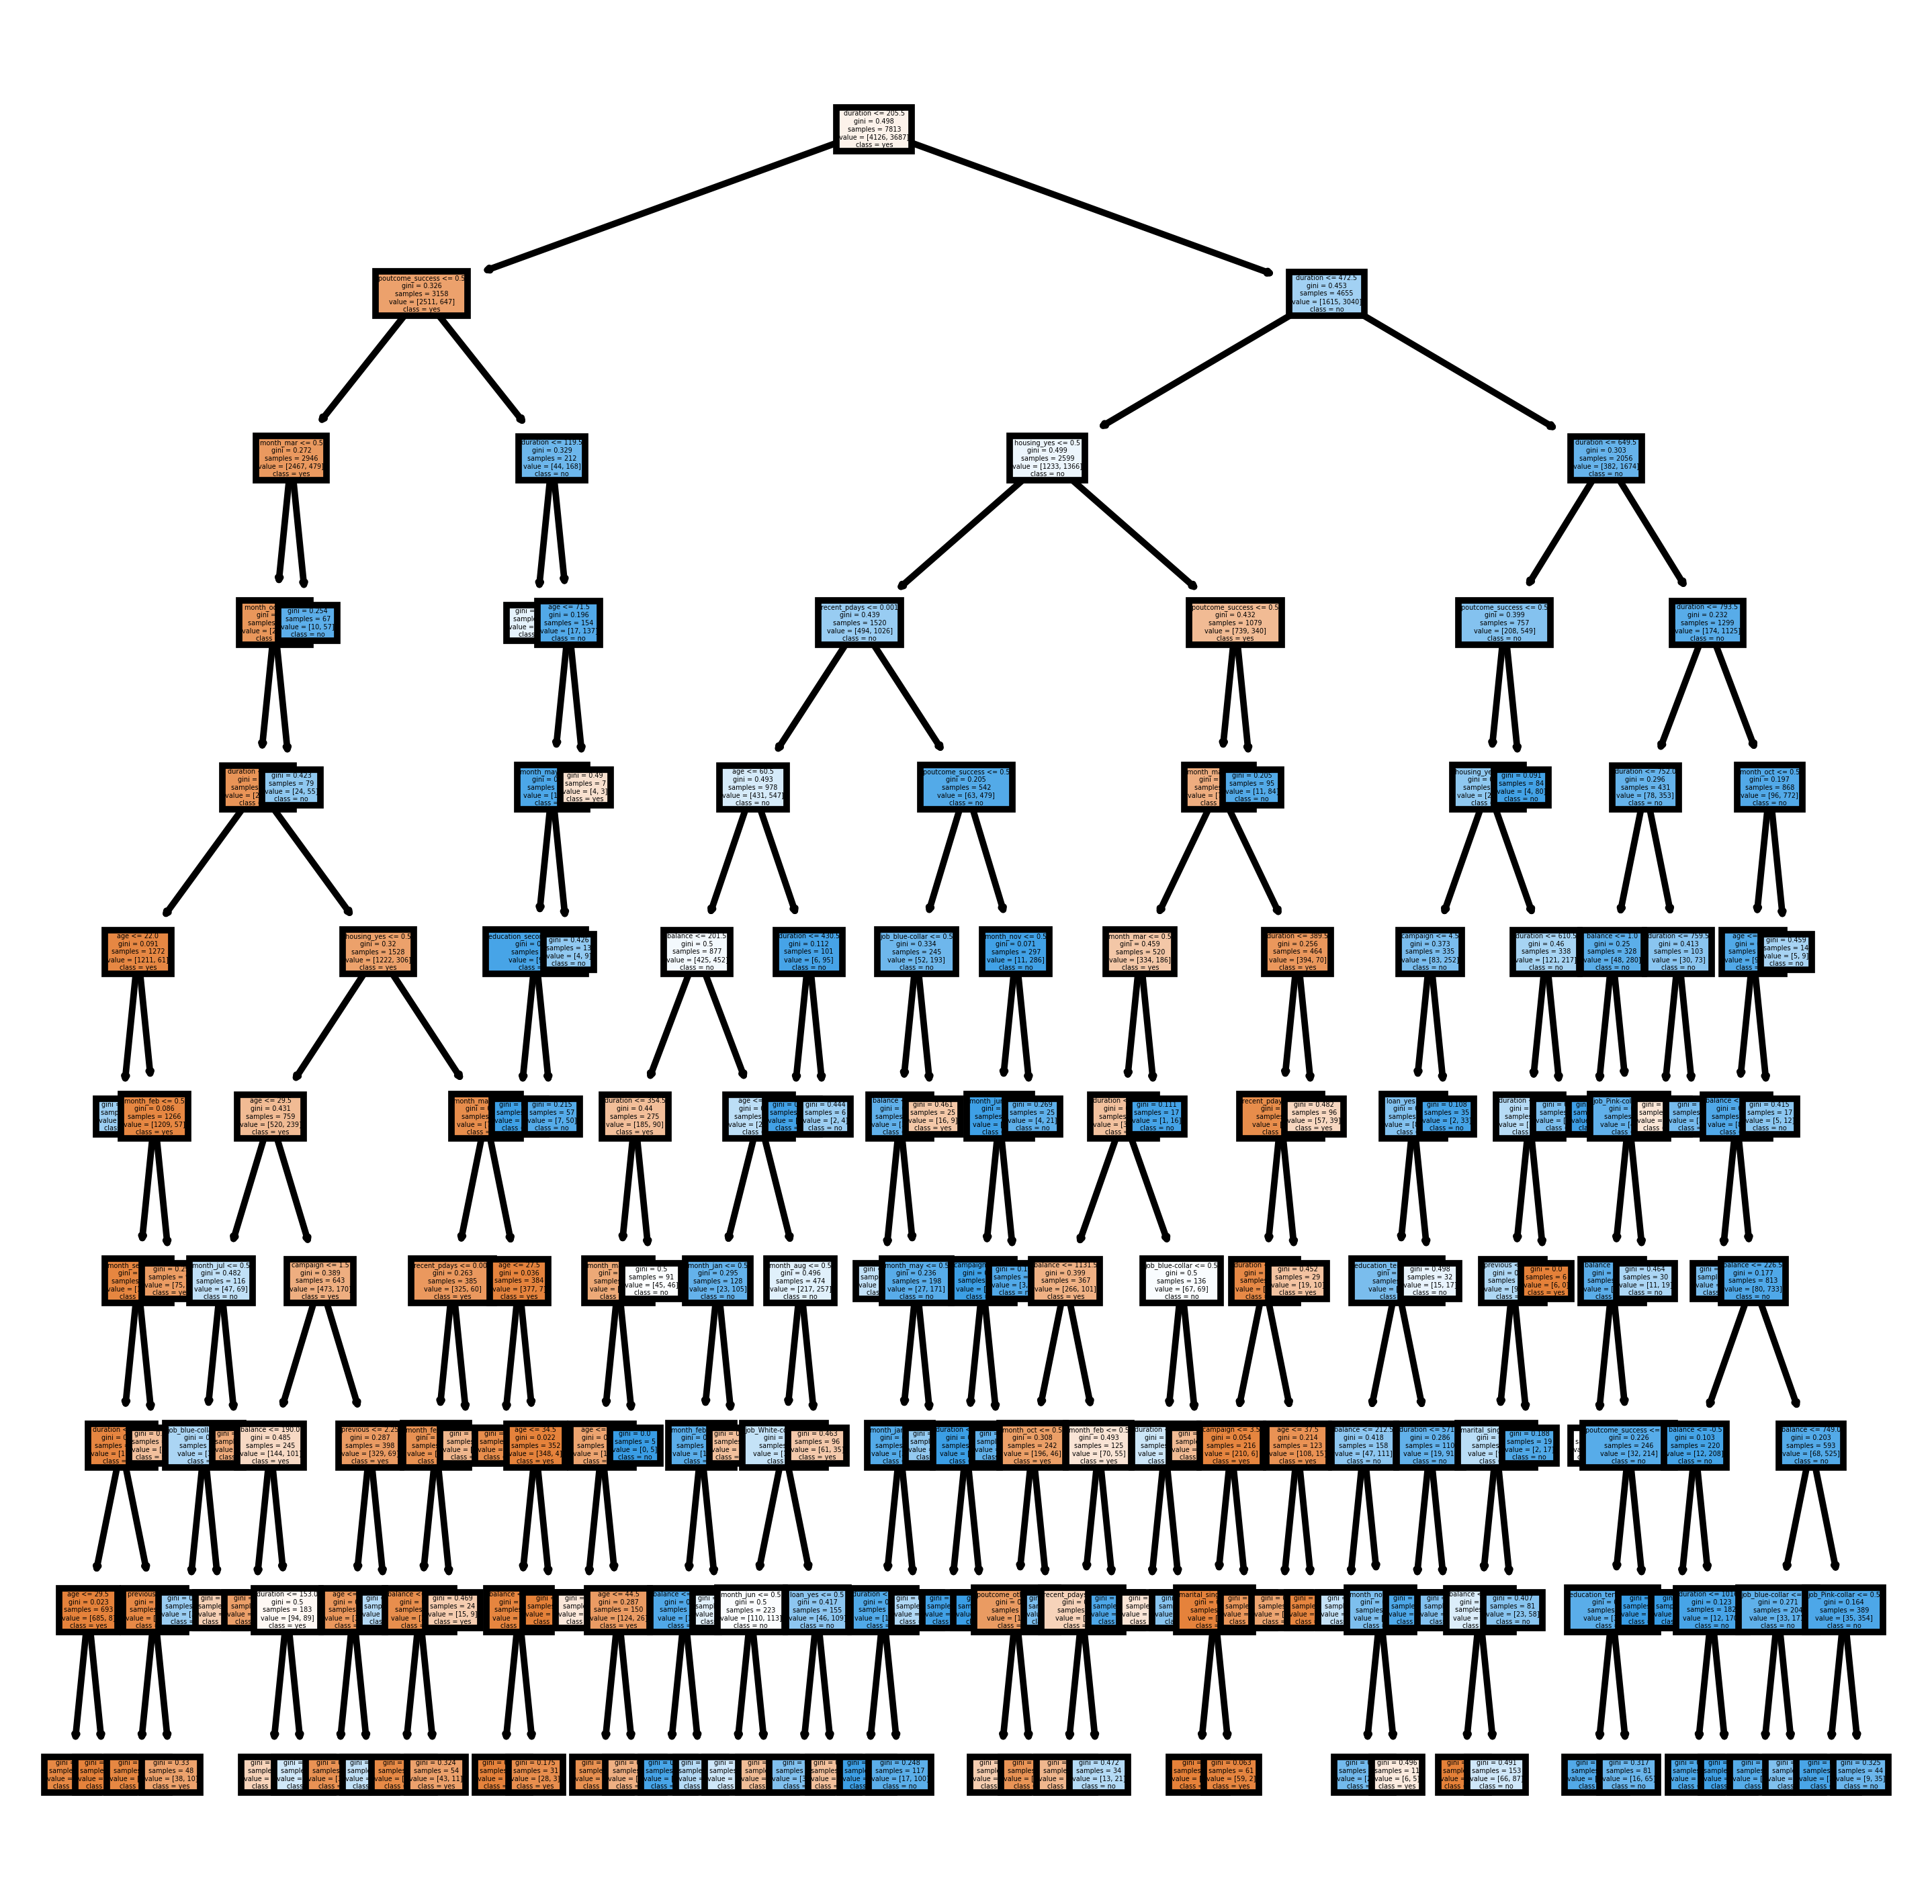

In [268]:
from sklearn.tree import plot_tree
fn = x_train.columns.to_list()
cn = ["yes", "no"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 700)
dt_plot = plot_tree(tree2, feature_names = fn , class_names = cn, filled = True)

In [270]:
from sklearn.tree import export_text
rules = export_text(tree2, feature_names = x_train.columns.to_list())
print(rules)

|--- duration <= 205.50
|   |--- poutcome_success <= 0.50
|   |   |--- month_mar <= 0.50
|   |   |   |--- month_oct <= 0.50
|   |   |   |   |--- duration <= 106.50
|   |   |   |   |   |--- age <= 22.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  22.00
|   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |   |--- duration <= 77.50
|   |   |   |   |   |   |   |   |   |--- age <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  29.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- duration >  77.50
|   |   |   |   |   |   |   |   |   |--- previous <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- previous >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- month_sep >  0.50
|   |   |   |   |   |  

## Feature Importance 

In [271]:
tree2.feature_importances_

array([4.66641643e-02, 3.20138970e-02, 5.19523123e-01, 1.04614460e-02,
       6.78991929e-03, 4.21688390e-02, 1.94476390e-03, 3.41827317e-03,
       8.20100480e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.46153467e-03, 2.97335835e-04, 1.34414591e-03, 0.00000000e+00,
       0.00000000e+00, 1.00294344e-01, 3.09283525e-03, 3.67651287e-03,
       0.00000000e+00, 7.34873012e-03, 2.76096022e-03, 1.54081207e-03,
       2.68601374e-03, 4.01056525e-02, 1.49989482e-02, 1.38165852e-03,
       2.71050024e-02, 1.04542386e-03, 1.94504175e-03, 1.17729617e-01])

In [276]:
feature_importance = pd.DataFrame({"Features" : x_train.columns, "Importance" : tree2.feature_importances_}).sort_values(by = ["Importance"], ascending = False)

In [277]:
feature_importance

Features  Importance
2              duration    0.519523
31     poutcome_success    0.117730
17          housing_yes    0.100294
0                   age    0.046664
5          recent_pdays    0.042169
25            month_mar    0.040106
1               balance    0.032014
28            month_oct    0.027105
26            month_may    0.014999
3              campaign    0.010461
8       job_blue-collar    0.008201
21            month_feb    0.007349
4              previous    0.006790
19            month_aug    0.003677
7      job_White-collar    0.003418
18             loan_yes    0.003093
22            month_jan    0.002761
24            month_jun    0.002686
30       poutcome_other    0.001945
6       job_Pink-collar    0.001945
23            month_jul    0.001541
12       marital_single    0.001462
27            month_nov    0.001382
14   education_tertiary    0.001344
29            month_sep    0.001045
13  education_secondary    0.000297
15    education_unknown    0.000000
20            month_dec    0.000000
11      marital_married    0.000000
10       job_technician    0.000000
9       job_self-depend    0.000000
16          default_yes    0.000000

<Axes: xlabel='Features', ylabel='Importance'>

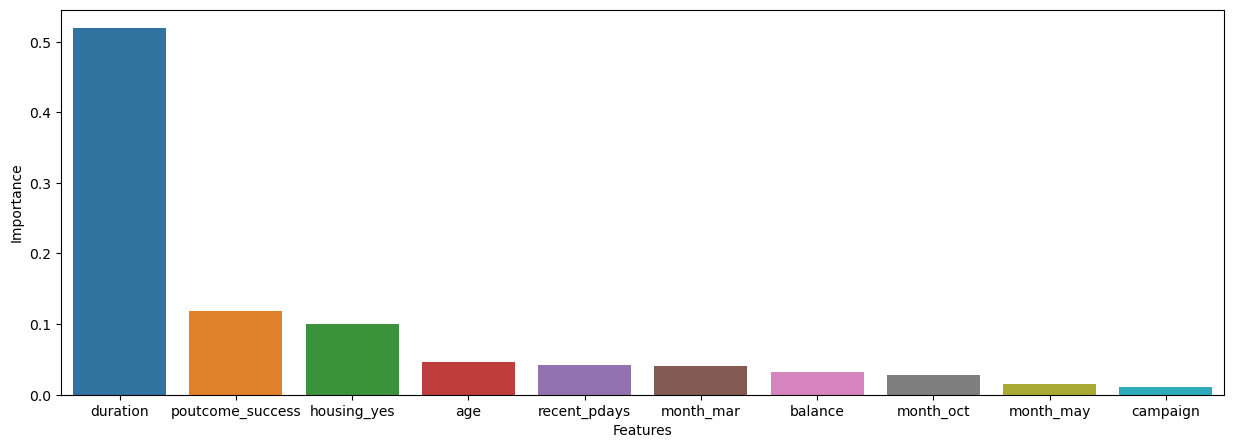

In [279]:
plt.figure(figsize = (15,5))
sns.barplot(data = feature_importance.head(10), x = "Features", y = "Importance")